In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
df = pd.read_csv('karriere-at.csv')
df.head()

,Unnamed: 0,title,text,url
0,0,"Junior Software-Developer (m, w, x) bei it-eXp...","Du hast gerade deine Ausbildung an der HTL, Un...",https://www.karriere.at/jobs/6431312
1,1,Senior Java Software Developer (d/w/m) bei EBC...,Senior Java Software Developer (d/w/m) * Wien ...,https://www.karriere.at/jobs/6199814
2,2,Senior Java Entwickler (m/w/d) bei Computer Fu...,Senior Java Entwickler (m/w/d) Java Entwickler...,https://www.karriere.at/jobs/6490925
3,3,(Senior) Java Developer (m/w) bei TODAY Expert...,(Senior) Java Developer (m/w) to>day is your d...,https://www.karriere.at/jobs/6472427
4,4,Java Fullstack Developer (m/w/d) - Softwareent...,Wien Festanstellung Direktvermittlung Jobnr. 4...,https://www.karriere.at/jobs/6506291


In [5]:
df=df.drop("url", axis='columns')

In [6]:
def cleanDescription(descText):
    descText = descText.lower() #converting to lowercase
    descText = re.sub('http\S+\s*', ' ', descText)  # remove URLs
    descText = re.sub('RT|cc', ' ', descText)  # remove RT and cc
    descText = re.sub('#\S+', '', descText)  # remove hashtags
    descText = re.sub('@\S+', '  ', descText)  # remove mentions
    descText = re.sub(r'[0-9]', '', descText) # remove numbers
    descText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', descText)  # remove punctuations
    descText = re.sub(r'[^\x00-\x7f]',r' ', descText) # remove non Non ASCII CHarecter
    descText = re.sub('\s+', ' ', descText)  # remove extra whitespace
    return descText

In [7]:
df['cleaned_re'] = df['text'].apply(lambda x:cleanDescription(x))
df.head() 

,Unnamed: 0,title,text,cleaned_re
0,0,"Junior Software-Developer (m, w, x) bei it-eXp...","Du hast gerade deine Ausbildung an der HTL, Un...",du hast gerade deine ausbildung an der htl uni...
1,1,Senior Java Software Developer (d/w/m) bei EBC...,Senior Java Software Developer (d/w/m) * Wien ...,senior java software developer d w m wien als ...
2,2,Senior Java Entwickler (m/w/d) bei Computer Fu...,Senior Java Entwickler (m/w/d) Java Entwickler...,senior java entwickler m w d java entwickler m...
3,3,(Senior) Java Developer (m/w) bei TODAY Expert...,(Senior) Java Developer (m/w) to>day is your d...,senior java developer m w to day is your day ...
4,4,Java Fullstack Developer (m/w/d) - Softwareent...,Wien Festanstellung Direktvermittlung Jobnr. 4...,wien festanstellung direktvermittlung jobnr un...


In [8]:
def text_clean_2(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_sentence = []
  wnl = WordNetLemmatizer()
 
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  lemmatized_string = ' '.join([wnl.lemmatize(words) for words in filtered_sentence])
  return lemmatized_string         
  #return filtered_sentence

In [9]:
df['cleaned_text'] = df['cleaned_re'].apply(lambda x:text_clean_2(x))
df.head(2)

,Unnamed: 0,title,text,cleaned_re,cleaned_text
0,0,"Junior Software-Developer (m, w, x) bei it-eXp...","Du hast gerade deine Ausbildung an der HTL, Un...",du hast gerade deine ausbildung an der htl uni...,du hast gerade deine ausbildung der htl uni od...
1,1,Senior Java Software Developer (d/w/m) bei EBC...,Senior Java Software Developer (d/w/m) * Wien ...,senior java software developer d w m wien als ...,senior java software developer w wien al inter...


In [10]:
df=df.drop("cleaned_re", axis='columns')
df

,Unnamed: 0,title,text,cleaned_text
0,0,"Junior Software-Developer (m, w, x) bei it-eXp...","Du hast gerade deine Ausbildung an der HTL, Un...",du hast gerade deine ausbildung der htl uni od...
1,1,Senior Java Software Developer (d/w/m) bei EBC...,Senior Java Software Developer (d/w/m) * Wien ...,senior java software developer w wien al inter...
2,2,Senior Java Entwickler (m/w/d) bei Computer Fu...,Senior Java Entwickler (m/w/d) Java Entwickler...,senior java entwickler w java entwickler w wie...
3,3,(Senior) Java Developer (m/w) bei TODAY Expert...,(Senior) Java Developer (m/w) to>day is your d...,senior java developer w day day today expert o...
4,4,Java Fullstack Developer (m/w/d) - Softwareent...,Wien Festanstellung Direktvermittlung Jobnr. 4...,wien festanstellung direktvermittlung jobnr un...
...,...,...,...,...
862,862,Web Developer bei ADF International Austria ge...,Everyone says they want to change the world. W...,everyone say want change world looking people ...
863,863,Support Engineer (f/m/d) bei DIMOCO Payments G...,"DIMOCO, founded in 2000, is a regulated paymen...",dimoco founded regulated payment company hold ...
864,864,Lehre Applikationsentwicklung - Coding bei eur...,STARTE DEINE KARRIERE! LEHRE APPLIKATIONSENTWI...,starte deine karriere lehre applikationsentwic...
865,865,Senior Big Data Engineer (m/w/d) bei STIWA Gro...,"Die STIWA Group, mit rund 2.300 MitarbeiterInn...",die stiwa group mit rund mitarbeiterinnen ist ...


In [11]:
df.shape

(867, 4)

In [12]:
#getting the entire resume text
corpus=" "
for i in range(0,867):
    corpus= corpus+ df["cleaned_text"][i]

In [27]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('german')

alpha_word = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n' 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
new_word = ['un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen','liegt','st', 'erstellung','part','pr','mehrj','spannende', 'mindestgehalt','art','rund','ten','idealerweise','softwarel','bereitschaft','arbeitest','stellen','com','hrige','datenbanken','weltweit','ro','arbeitsweise','end', 'gesundheit','requirement','studium','qualifikationen', 'gt', 'selbstst','bringst','expert', 'arbeitsumfeld','karriere','jahre', 'angebot','regelm','bereits','offer','modernen', 'konzeption','umgang', 'ideen', 'onboarding', 'ren', 'architektur', 'implementierung', 'frau', 'ndige','high', 'good', 'customer', 'tech', 'chancengleichheit','en', 'user', 'inkl','mail','verantwortung','well''informationen','neuer','leidenschaft','rolle', 'erwartet','mobile','durchf','zahlreiche','arbeitsplatz', 'jahren','beim', 'kollektivvertrag','nstigungen','year','pro','top','freude', 'per','wiener', 'salzburg','weiterbildungen','process','gut','ffentliche','opportunity', 'ndig','hohe','betrieb','wissen','anbindung','glichen','kund','looking','aktiv','lebenslauf','welt', 'diverse','themen','wort','weiterbildungsm','lage','gesamten', 'balance', 'kv', 'sport', 'gross', 'geh', 'bietet','optimierung', 'like', 'platform','vielfalt','zusammen', 'apply', 'performance', 'schrift','stehen','ort','bewirb', 'gen', 'hour', 'based', 'quality', 'ansprechpartner','fundierte','state','innovativen','people', 'ansprechperson','tze', 'schwerpunkt','beko', 'qualification','individuelle','jahresbruttogehalt','berufserfahrung','umfeld']
finance_word = ['kollektivvertragliches', 'ausbildungsnachweise', 'einfache', 'arbeite', 'frische', 'winter', 'trainingsangebote', 'glaube', 'investigation', 'fortbildungen', 'kommt', 'mitarbeiterrestaurant', 'porsche', 'wish', 'partnerin', 'proaktivit', 'traineeprogramm', 'vertrauen', 'valued', 'betriebswirtschaftlicher', 'commissioning', 'stromhandel', 'present', 'harris', 'mobil', 'belief', 'electromobility', 'multikulturelle', 'rperlicher', 'marketing', 'bewegung', 'bankensektor', 'produktlebenszyklus', 'willkommen', 'genauer', 'folgende', 'vorgaben', 'datenmodellen', 'fremdwort', 'anzupassen', 'lindner', 'erdem', 'ambitious', 'trainingsangebot', 'neudorf', 'grenz', 'technologieunternehmen', 'treten', 'theorie', 'applyal', 'naschmarkt', 'komponenten', 'comsenior', 'digitaler', 'uk', 'fachbereiches', 'betreuer', 'durchblick', 'nutzung', 'besonderer', 'bedienelemente', 'attraktiv', 'laola', 'folgendem', 'karfreitag', 'vision', 'ngt', 'biological', 'gruppen', 'investor', 'ausbilden', 'energie', 'mountain', 'fungsnahen', 'klimaticket', 'cooperating', 'fortschritte', 'gesetzt', 'stabil', 'sicherheit', 'multi', 'durchsetzungsf', 'sound', 'hrte', 'beachvolleyballplatz', 'erweitert', 'wirtschaftsstudium', 'zielorientierten', 'alignment', 'denker', 'prozess', 'personalentwicklung', 'hnlicher', 'dagogische', 'carrierplatform', 'analysieren', 'dynamisch', 'zukunftssicheren', 'zentralem', 'skilled', 'report', 'fungen', 'positive', 'liebst', 'verstand', 'hsbc', 'driving', 'holen', 'konzeptionell', 'projektleiter', 'beruflich', 'analysis', 'billiard', 'remuneration', 'lernkultur', 'ausarbeitungen', 'strong', 'taste', 'large', 'wachstumsbranche', 'legst', 'verbringst', 'winterthur', 'philosophie', 'flughafen', 'ngigen', 'gleitzeitmodell', 'familiarity', 'exhibition', 'starke', 'verfahrenstechnik', 'ing', 'weitreichende', 'idealist', 'tzungen', 'induction', 'projektspezifischen', 'production', 'produzieren', 'assure', 'impfaktionen', 'bewerbungsfrist', 'appreciation', 'angabe', 'keep', 'gleichzeitig', 'organisatorischer', 'experimenting', 'teilzeitstelle', 'paperless', 'abteilungsleitung', 'parat', 'projektumfeld', 'iris', 'zielgerichtet', 'mesh', 'matrix', 'hows', 'beliebtesten', 'antriebsstrang', 'fester', 'anpassung', 'hochwertiger', 'comfortably', 'deutschland', 'maschinen', 'wenig', 'ngere', 'diskret', 'legislation', 'rlichen', 'domestic', 'technologiekonzern', 'verbindet', 'einkaufsgutscheine', 'anpassen', 'autokauf', 'abschlie', 'bisher', 'yearsjob', 'tiere', 'ecosystem', 'einschulung', 'emina', 'muster', 'euro', 'mentalit', 'lich', 'ltig', 'erlangtes', 'needed', 'sabrina', 'leader', 'packaging', 'digitalisation', 'leitung', 'regarding', 'mitteilung', 'take', 'generate', 'zielorientierung', 'beif', 'indicate', 'status', 'kundenindividuelle', 'finanzamt', 'anschreiben', 'beruflichen', 'honoriert', 'unternehmenssitz', 'serviceorientiert', 'photoshop', 'ia', 'erlernen', 'insiderin', 'teamkultur', 'bereit', 'ausgew', 'aufgabenverteilung', 'course', 'bfi', 'stichwort', 'themenstellungen', 'managementberatungs', 'teammitglied', 'verbesserungsvorschl', 'anforderungsprofils', 'rewarding', 'due', 'gesetzlichen', 'kniffligen', 'sterreichischer', 'ansporn', 'fit', 'mathematische', 'konsumieren', 'health', 'organisation', 'zugewiesen', 'duschen', 'bevorzugen', 'developing', 'evolve', 'zukunftstr', 'hauptbahnhof', 'mmern', 'staffing', 'wandelnden', 'bekannte', 'schroers', 'abschlussarbeiten', 'ftseinheiten', 'steigen', 'vorgesehen', 'integrierten', 'technical', 'hochautomatisierte', 'fibu', 'ambitionierte', 'erleichtert', 'wochen', 'mindestwerte', 'quantitative', 'professionellen', 'structured', 'current', 'lust', 'interpretieren', 'umfassender', 'sung', 'correct', 'anf', 'nzt', 'darf', 'warten', 'theory', 'elearning', 'involviert', 'wenden', 'werkzeugen', 'energiemanagement', 'embedded', 'ausschreibungen', 'flexibility', 'discus', 'betreiben', 'projektsteuerung', 'schl', 'richtige', 'gewinn', 'einhaltung', 'angesprochen', 'pragmatismus', 'verschiedensten', 'ck', 'supervisor', 'empfehlung', 'personalberatungen', 'stimmen', 'zirka', 'prinzipien', 'menge', 'acht', 'n', 'analysem', 'zuschuss', 'sorgt', 'anforderungsanalysen', 'entsprechend', 'ausschlaggebend', 'deadline', 'desk', 'fischerstra', 'klasse', 'ermutigen', 'entwicklungskenntnisse', 'sd', 'materie', 'aufstrebenden', 'back', 'zeichnungen', 'dignity', 'artiger', 'applying', 'history', 'kandidatinnen', 'optimaler', 'manner', 'formel', 'deeply', 'attitude', 'fachspezifische', 'determination', 'brennen', 'mittagessen', 'schrecken', 'glbg', 'zeitalter', 'anforderungsprofil', 'marktad', 'ume', 'aktuellem', 'train', 'optimieren', 'feinen', 'aneignen', 'weihnachtsfeiern', 'traffic', 'servicemanagement', 'hunde', 'energieversorgung', 'firmengeschichte', 'facebook', 'oesterreichische', 'pensionskassa', 'kommunizieren', 'natural', 'festgesetzt', 'erwirtschaftet', 'papierloses', 'profilabgeschlossenes', 'auslastungsspitzen', 'transparent', 'erreicht', 'mechanische', 'hotellerie', 'italien', 'posch', 'view', 'stufe', 'idee', 'vergleich', 'inhouse', 'produzierendes', 'tagesgesch', 'bc', 'implementation', 'reality', 'facettenreichen', 'qliksense', 'anforderungsworkshops', 'path', 'koller', 'ai', 'ller', 'weshalb', 'freust', 'divide', 'zufrieden', 'vertragsverwaltung', 'site', 'handwerk', 'erneuerbare', 'besondere', 'rennweg', 'etablierten', 'vast', 'tackle', 'bistro', 'workspace', 'softwareentwickler', 'york', 'finanzbranche', 'sicher', 'coaching', 'dazugeh', 'kurs', 'belastbarkeit', 'freunde', 'teilzeit', 'presenting', 'bewerbenjetzt', 'iiasa', 'readiness', 'programme', 'mitbestimmt', 'leistungsf', 'air', 'zahlreicher', 'fill', 'definierter', 'thrive', 'kontaktaufnahme', 'berzeugt', 'fixen', 'erhebung', 'recognize', 'frauenf', 'wesentliche', 'made', 'completion', 'anzuwendenden', 'alone', 'sustain', 'talente', 'jobdesign', 'karriereschritt', 'anschluss', 'auto', 'materialwirtschaft', 'prozent', 'jobnummer', 'wohnzimmer', 'ausgerichtetes', 'tztes', 'vorteilsehr', 'coordinator', 'notwendige', 'vielseitige', 'entfaltung', 'automatisierungstechnik', 'ongoing', 'decide', 'austausch', 'tzendes', 'vorhaben', 'ausgezeichnetes', 'meistern', 'infrastructure', 'within', 'sagen', 'einrichtungen', 'eingeladen', 'tsbewusste', 'lautet', 'communicate', 'berichte', 'verankert', 'worauf', 'profession', 'compliance', 'networking', 'appreciative', 'bh', 'abteilung', 'proposal', 'ball', 'hrliches', 'uniform', 'remote', 'ltst', 'prozessanalyse', 'herausfordernden', 'zzgl', 'insbes', 'abseits', 'gemeinschaft', 'learned', 'nliche', 'ambitionierter', 'superm', 'beratungs', 'beratungsunternehmen', 'vergleichbare', 'simple', 'room', 'bewerbungsschreiben', 'employee', 'anforderungsmanagement', 'tssteigerung', 'sterr', 'igkeiten', 'mittels', 'zeichnet', 'vorhandener', 'jenseits', 'anforderungs', 'kontaktclarissa', 'eintrittstermins', 'treffen', 'multidimensionalen', 'mb', 'laufzeit', 'bg', 'schnellen', 'werdegang', 'adjustment', 'aufw', 'og', 'sorge', 'msc', 'australia', 'ausf', 'traffi', 'berufsbildenden', 'academy', 'betriebskindergarten', 'verbund', 'ex', 'boost', 'iphone', 'ndeten', 'horizon', 'erg', 'spiele', 'kurz', 'mtlicher', 'ndern', 'promising', 'ben', 'kontaktieren', 'lassen', 'fab', 'startgeb', 'auszeichnungen', 'specialist', 'gern', 'nachgelagerte', 'bereicherst', 'erreichbarer', 'minimize', 'knapp', 'ffis', 'inter', 'contribution', 'entsorgungswirtschaft', 'asap', 'integrate', 'belastbar', 'erfahrener', 'fahrradabstellplatz', 'lisa', 'anliegen', 'hilfst', 'gerungen', 'comparable', 'laufveranstaltungen', 'membership', 'erfolgreiche', 'arbeitsvertrag', 'verpflegung', 'gesundem', 'gym', 'feld', 'leichtbaukomponenten', 'sungsorientiert', 'mobiler', 'stra', 'wstd', 'informiert', 'dienstleistung', 'registriere', 'innsbruck', 'protected', 'weiterbildungsprogramm', 'datenverarbeitung', 'beschaffung', 'teamleiter', 'gespannt', 'expertise', 'sabbatical', 'hak', 'heren', 'angaben', 'outlining', 'dienstleistern', 'einander', 'ferenz', 'erhebst', 'digitalisieren', 'perfekten', 'systemlandschaften', 'ftserfolg', 'kennzahlen', 'etwaiger', 'sprechen', 'daher', 'osteurop', 'relating', 'passenden', 'side', 'wuzzeltisch', 'gruppe', 'expect', 'index', 'ssigsten', 'lebensmitteleinzelh', 'ideale', 'mbh', 'schulungsma', 'gelebter', 'bez', 'john', 'fungs', 'uniqueness', 'auswahl', 'digitale', 'hierarchien', 'two', 'erfolges', 'epku', 'wienab', 'erp', 'five', 'difference', 'adequate', 'fulfillment', 'rlich', 'konzernrichtlinien', 'startest', 'kandidaten', 'verl', 'zweistufig', 'bonuszahlungen', 'sterreichs', 'seeking', 'ndlich', 'collaborating', 'beitragen', 'implementing', 'ausdr', 'station', 'inbetriebnahme', 'spittal', 'bewusstsein', 'disabled', 'launching', 'vgl', 'possibletypefull', 'krisensicheren', 'methodische', 'peak', 'tzende', 'lukas', 'priority', 'creative', 'motivierenden', 'descriptionas', 'csm', 'customizing', 'bold', 'melden', 'hnliche', 'anl', 'verhandlungsbasis', 'sattledt', 'globus', 'fusionieren', 'nachhaltig', 'digitalized', 'leistungsorientierte', 'widmen', 'achieved', 'security', 'gerlinde', 'teamorientiert', 'wienerstadtwerke', 'rsennotierte', 'wirtschaftlichen', 'altersvorsorge', 'anrechenbaren', 'sozial', 'erwartete', 'kompaktmaschinen', 'pressure', 'serviceorientiertes', 'mitdenken', 'jahresbruttobezug', 'kpis', 'ahorner', 'ftsprozessen', 'kernbankensystem', 'written', 'passgenauen', 'gleitzeit', 'finanzmarktaufsicht', 'pausenzonen', 'angestellt', 'challenging', 'fehlen', 'applikationsbetreuung', 'totally', 'umfassendes', 'programmierkenntnisse', 'bankgesch', 'crucial', 'gige', 'hrtes', 'eigenverantwortlichen', 'strength', 'selbstorganisierte', 'ums', 'firmenkultur', 'netconomy', 'ndergef', 'motivierte', 'kreative', 'automobilbranche', 'steckt', 'affin', 'parameter', 'ratbacher', 'beitrag', 'inspiring', 'passgenau', 'aufgeschlossen', 'mitarbeiterrabatte', 'foreign', 'treibst', 'wu', 'erfolgter', 'bankiers', 'ever', 'rundum', 'might', 'ansprechpartnerin', 'stetige', 'hrerschein', 'verfolgt', 'gesellschaftliches', 'bring', 'advancement', 'rthersee', 'read', 'tte', 'pia', 'beschreiben', 'mitgestaltungsm', 'inspirierenden', 'dienstzeugnisse', 'catalyst', 'deutschsprachigen', 'impfungen', 'hearing', 'eintrittsdatum', 'cksspiel', 'gesellschaftlichen', 'kununu', 'ndischer', 'abwechslungsreicher', 'zoom', 'finanzen', 'carmen', 'teamlead', 'kannstdich', 'kollegin', 'stabilit', 'supportf', 'dienen', 'ethnischer', 'productivity', 'landwirtschaftlichen', 'steigerung', 'vertiefung', 'individueller', 'kommunikationsst', 'iventa', 'erstellen', 'rztin', 'fixanstellung', 'hrungskraft', 'objektorientierten', 'genaues', 'legt', 'virtuelle', 'gn', 'hierarchie', 'bewerbensenior', 'themenfeldern', 'device', 'quick', 'beneiden', 'vba', 'agieren', 'einsteiger', 'voranzubringen', 'coach', 'aim', 'create', 'perspektivenberufliche', 'themenbereichen', 'strategischer', 'paas', 'gezielt', 'kundenportal', 'schicke', 'bliches', 'beginning', 'nachdenken', 'changing', 'defining', 'bew', 'nam', 'kennen', 'planen', 'partnern', 'applikations', 'vertreibt', 'desirable', 'hear', 'erweiterungen', 'iam', 'verantworte', 'vertragspartner', 'analytischem', 'rush', 'origination', 'drehscheibe', 'require', 'konzeptionellen', 'verantwortungsvollen', 'diagnose', 'archiving', 'situationen', 'ersetzt', 'wachstum', 'propose', 'bezahlte', 'urbanen', 'hausverstand', 'sichtbar', 'verstellbare', 'uft', 'arbeitszeitgestaltung', 'behinderungen', 'repair', 'track', 'closely', 'aufgabenspektrum', 'visa', 'mindeststandards', 'generous', 'iva', 'philip', 'ounting', 'ganzheitlich', 'urlaub', 'berf', 'maschinenbau', 'jahreszielgehalt', 'internal', 'direction', 'bratislava', 'highest', 'telefonnummer', 'erbringen', 'aufgabenschwerpunkte', 'ui', 'sp', 'absolviertes', 'befinden', 'partnerschaftsstatus', 'programmen', 'weakness', 'count', 'visual', 'industry', 'niveau', 'delivered', 'demand', 'hne', 'wobei', 'klarem', 'sharepoint', 'here', 'gehaltsvereinbarung', 'kooperativem', 'konkreten', 'sportkurse', 'quate', 'subject', 'esp', 'supermarket', 'car', 'motivieren', 'ndler', 'regelungen', 'freundliches', 'workplace', 'seitigen', 'document', 'notwendiger', 'bauger', 'become', 'auftretenden', 'innovativste', 'denk', 'vertragsart', 'zahlungsverkehrs', 'modernste', 'ctfl', 'nadine', 'hilfsbereite', 'bestehenden', 'rsching', 'markttrends', 'firmenrabatte', 'sungsf', 'hrers', 'mathematischen', 'numerous', 'schulautonomen', 'administrator', 'industriebetrieben', 'diensthandy', 'method', 'technological', 'komfortabler', 'basierten', 'tzendorf', 'projektmanagern', 'bekommst', 'food', 'kennziffer', 'anfang', 'herrscht', 'satisfied', 'exceeding', 'warmen', 'kantinen', 'telekommunikation', 'george', 'zukunftssicherer', 'interaktiven', 'letter', 'kontaktperson', 'fahrrad', 'effektive', 'insightful', 'ische', 'betreut', 'tsring', 'zugeh', 'union', 'nation', 'applikationsteam', 'tutorial', 'analytics', 'einblicke', 'kostenloser', 'bringt', 'zusammenzubringen', 'bildest', 'absoluter', 'formed', 'guest', 'someone', 'kommunikationsstark', 'einkaufsverg', 'berichtswesens', 'multinational', 'happen', 'schick', 'sympathisches', 'messung', 'transparenten', 'nachhaltiges', 'kundinnen', 'autonome', 'besprechungen', 'vorzubereiten', 'tauschen', 'ambitionen', 'rzt', 'orientieren', 'studienrichtungen', 'gomarket', 'bewerberportal', 'respecting', 'role', 'multikulturellen', 'wasserversorgung', 'ansonsten', 'turm', 'methode', 'milestone', 'ftsm', 'studying', 'represented', 'jobausschreibung', 'hbf', 'qualifizierten', 'absolvierung', 'kurzen', 'aktuellen', 'completed', 'weihnachtsurlaub', 'jobnr', 'supported', 'hochqualifizierten', 'hierbei', 'drop', 'add', 'hnliches', 'physik', 'wurde', 'ebenfalls', 'reliant', 'transportl', 'dienstleister', 'rt', 'verhandlungssicheres', 'spoken', 'parsing', 'touch', 'philosophy', 'jira', 'bleiben', 'situation', 'gesucht', 'reiset', 'gaisbergstrasse', 'three', 'developer', 'introduction', 'mindest', 'kollaboration', 'intersection', 'ror', 'technologically', 'electric', 'dart', 'einarbeitungsphase', 'truly', 'competitive', 'integrierte', 'verstreut', 'lebt', 'cklabruck', 'mer', 'durchsetzungsst', 'weiterentwicklungen', 'suchst', 'bezug', 'notwendig', 'gestalterisch', 'kommunikationswege', 'essful', 'formalit', 'umgesetzt', 'designed', 'upcoming', 'karl', 'seminaren', 'tz', 'enture', 'anspruchsvolles', 'tig', 'set', 'versierter', 'ua', 'medizintechnik', 'kinderbetreuung', 'elektrofahrzeuge', 'mitarbeiterorientierten', 'javascript', 'pierer', 'gonzagagasse', 'collectively', 'seek', 'geschmack', 'modellen', 'einrichtung', 'follow', 'zeugnissen', 'karrieref', 'nachbetreuung', 'schnelllebigen', 'monitor', 'vorne', 'employ', 'markt', 'parental', 'rperliche', 'einleitung', 'gesundheitsma', 'april', 'monatsgehalt', 'significantly', 'stabiler', 'lead', 'ountable', 'grieshofer', 'om', 'revision', 'berufung', 'betting', 'achtest', 'betriebswirtschaftlichen', 'dom', 'freundschaftliches', 'analytic', 'unterliegt', 'ausgeschriebenen', 'sungsorientierte', 'sungsportfolio', 'ftigten', 'belh', 'rkt', 'heute', 'typischerweise', 'somit', 'wirtschaftlich', 'plm', 'sehen', 'bautechnologiekonzern', 'nah', 'essensbons', 'herrmann', 'anif', 'funktionalen', 'wuestenrot', 'virtuell', 'acquiring', 'berstunden', 'out', 'aufgabengebiet', 'coffee', 'inmitten', 'softdrinks', 'steiermark', 'start', 'beherrscht', 'economic', 'lunch', 'horst', 'italian', 'gmbhstandort', 'mitsehr', 'ausgebildet', 'member', 'lifting', 'anzubieten', 'josephine', 'medizinische', 'imagine', 'prozessorientiert', 'conversion', 'fp', 'weiterentwickeln', 'energieerzeugung', 'maturity', 'epko', 'vertragsmanagement', 'grundkenntnisse', 'bewerbungszeitpunkt', 'favorable', 'banking', 'interdisziplin', 'party', 'configuration', 'sex', 'modernisierung', 'norm', 'arbeitsort', 'lenz', 'smart', 'simplify', 'sprachkurse', 'data', 'posse', 'mexiko', 'keeping', 'auszubauen', 'application', 'electrification', 'rechtlichen', 'operating', 'methodik', 'racing', 'conception', 'kooperationspartnern', 'committed', 'ndlern', 'governance', 'pluspunkt', 'decade', 'resolve', 'automate', 'generierung', 'wesentlicher', 'coming', 'einwandfreie', 'projektmanager', 'competing', 'release', 'sponsorship', 'gesundheitsbereich', 'vertrauens', 'adonis', 'konzept', 'driven', 'decken', 'epted', 'arbeitsbereichen', 'augen', 'student', 'corresponding', 'referenz', 'cke', 'kreatives', 'module', 'box', 'liefert', 'trading', 'lehr', 'others', 'hrliche', 'anzuwenden', 'themenbereich', 'schnell', 'entwicklungen', 'significant', 'gewerbe', 'gemeinsamer', 'leave', 'softwareeinf', 'versteht', 'lebensdauer', 'zwecke', 'warehouse', 'hochspannende', 'transport', 'able', 'motivierten', 'workday', 'ingredient', 'person', 'informationssicherheits', 'custom', 'waukesha', 'wissenstransfers', 'anvertrauen', 'anpacker', 'agilen', 'may', 'han', 'distributor', 'leicht', 'cross', 'gesund', 'recruitingprozesses', 'abnahme', 'fis', 'hervorragende', 'weitblick', 'expandierenden', 'tiefbau', 'choose', 'sozialleistungen', 'statistiken', 'local', 'integrative', 'willst', 'praktischen', 'gehst', 'sommerevent', 'birthday', 'grundausbildung', 'sexuellen', 'informationssystemen', 'womit', 'rdert', 'attraktiver', 'tigkeitsfelder', 'thesis', 'allgemeine', 'kundenportfolio', 'theoretisches', 'richtlinien', 'goody', 'konzipieren', 'einzige', 'higkeitselbstst', 'husqvarna', 'wirkung', 'duty', 'lernf', 'fitness', 'futurescomputerfutures', 'budgetverantwortlichen', 'grundlage', 'brille', 'ftigen', 'baustellen', 'rse', 'aimed', 'build', 'beantworte', 'tsanforderungen', 'shaping', 'sukzessive', 'chip', 'besprochen', 'geht', 'grazgesellschaft', 'agil', 'elektronik', 'hlfaktor', 'unterschiedlichster', 'bewegen', 'estate', 'discrete', 'factory', 'carrying', 'schulungsprogramm', 'schulung', 'formulieren', 'ftiger', 'alexander', 'erfolge', 'forward', 'energiewende', 'low', 'stenrot', 'ffnet', 'sps', 'wege', 'optimales', 'ergebnisse', 'jahresbezug', 'herrn', 'renden', 'seinfach', 'transactional', 'verschiedenster', 'strategieentwicklung', 'hst', 'cyber', 'bekannt', 'objekte', 'stressfreies', 'meist', 'thank', 'wert', 'origin', 'zusammenh', 'strategie', 'ndisches', 'impress', 'cklich', 'mobilit', 'fachschule', 'ssen', 'environmental', 'rker', 'gehaltspakete', 'vorausgesetzt', 'renewal', 'feature', 'komplexen', 'schalli', 'pitch', 'neugier', 'tu', 'firmenfeiern', 'related', 'ot', 'dolby', 'best', 'affinit', 'yp', 'ftigungsgruppe', 'centre', 'henverstellbare', 'gaming', 'evaluierungen', 'provisioning', 'globale', 'direktem', 'brillen', 'ausrollung', 'richtig', 'interview', 'leistungsspektrum', 'spezialist', 'sabbaticalssicherer', 'organisationseinheit', 'einblick', 'gelegt', 'endstufe', 'digung', 'mo', 'consulting', 'marital', 'motoren', 'pausen', 'schreibtisch', 'diversifiziertes', 'entgelt', 'umfassen', 'aktiven', 'abroad', 'mitbringt', 'skitag', 'weihnachtsfeier', 'architect', 'zeitliche', 'softwaresystemen', 'dedicated', 'effizientere', 'comfortable', 'gewinnen', 'listen', 'warehousing', 'entrepreneurship', 'political', 'predigen', 'bauteile', 'unternehmertum', 'alters', 'arnoldtalent', 'keba', 'ftsmodelle', 'profile', 'participation', 'morgen', 'vorteilerfahrung', 'zwingend', 'jobb', 'dienstleistungsunternehmen', 'studierst', 'sst', 'sprach', 'unverzichtbar', 'kritisch', 'nein', 'hrera', 'zusatzausbildung', 'exchange', 'weichen', 'automotive', 'co', 'mehrwert', 'konsumg', 'supervision', 'going', 'valuable', 'carrier', 'antriebstechnik', 'allgemeines', 'discrimination', 'peter', 'nstigt', 'industrieller', 'sv', 'faq', 'bsc', 'bezuschussung', 'tour', 'begleite', 'nutzerfreundlichen', 'ausgeschrieben', 'tionen', 'artige', 'developern', 'kundenkontakt', 'vodafone', 'bewerbungsprozess', 'thinking', 'motorrad', 'vpms', 'laufbahn', 'einbringst', 'coding', 'urate', 'gewissenhaft', 'cken', 'jobfull', 'ergebnisorientierte', 'bewerbeninternship', 'profundes', 'tskennzahlen', 'selbstverantwortlich', 'friendly', 'arbeitenzahlreiche', 'zusatzleistungen', 'mediendesign', 'beneficial', 'spa', 'qualitativen', 'prozesslandschaft', 'vorstellungen', 'deutschen', 'ambitionierten', 'dokumentierst', 'regul', 'nationalit', 'palette', 'serve', 'term', 'mitarbeitergespr', 'tiges', 'plenty', 'study', 'mitgestalten', 'infrastruktur', 'feste', 'offene', 'aussage', 'gesorgt', 'convenience', 'erfolgreichem', 'interessanter', 'juli', 'organisierter', 'prozessorientierten', 'zahlenaffinit', 'weibliche', 'verbundenen', 'kitchen', 'funktionalit', 'klare', 'erweitern', 'allowance', 'gmbhoffice', 'technischen', 'zukunftsperspektiven', 'tradition', 'durchsetzungsverm', 'physican', 'defines', 'ssis', 'timely', 'vacation', 'sofortiger', 'punktuell', 'deployment', 'abgeleisteter', 'raum', 'laut', 'suit', 'mobileworking', 'eigeninitiativ', 'berichtspyramide', 'kosten', 'network', 'chst', 'konzernmutter', 'verfolgst', 'swift', 'systemdienste', 'dran', 'austrian', 'malta', 'adressieren', 'hunderten', 'renommierter', 'recht', 'transformationen', 'wissbegierig', 'einzigartigen', 'nfte', 'analytische', 'macbook', 'klares', 'linkedin', 'finalrunde', 'sthetik', 'erforderliche', 'sportangebote', 'behavior', 'adobe', 'stress', 'organisationsgeschick', 'fachexperten', 'fulfilled', 'edi', 'kanada', 'chance', 'stimmung', 'korrekturen', 'bindeglied', 'dienstleistungsbranche', 'vorwissen', 'singled', 'unternehmensstandort', 'woman', 'anforderung', 'fl', 'gudrun', 'weltanschauung', 'finanztransaktionen', 'konzernstruktur', 'externer', 'spain', 'brauchen', 'vordergrund', 'ausr', 'brandstaetter', 'iger', 'sinne', 'chtigen', 'folgendes', 'firmeninternes', 'economics', 'urlaubstage', 'hinsichtlich', 'write', 'exzellente', 'hcm', 'managementebene', 'verantwortlich', 'improved', 'prototype', 'rfen', 'vortr', 'erfahrenen', 'zweitgespr', 'run', 'hut', 'eigene', 'wherever', 'sustainable', 'aufgabengebieten', 'shop', 'erzielen', 'vitae', 'fer', 'berechnungs', 'handelskonzern', 'runden', 'long', 'verantwortungsbewusst', 'preise', 'selbstbestimmtes', 'bewerbendata', 'dach', 'linie', 'bezahlung', 'kollegiales', 'medical', 'sc', 'projektzielen', 'assembly', 'vielen', 'cooles', 'herstellern', 'unternehmerischen', 'haas', 'erstellt', 'verlassen', 'ausgestatteten', 'genau', 'funktioniert', 'sungskompetenz', 'eingesetzt', 'mittagsmen', 'bestehende', 'hinterlassen', 'close', 'erzielt', 'lokalen', 'macht', 'zahlreichen', 'hrern', 'universit', 'ready', 'consists', 'owned', 'berufen', 'wann', 'gasse', 'automatisierungs', 'gesundes', 'bpo', 'herstellung', 'moment', 'bindest', 'karrierewege', 'vorausschauend', 'bisheriger', 'stellenbeschreibung', 'sichtbarkeit', 'weihnachtsgeld', 'pause', 'programm', 'punkten', 'halbmayr', 'kommunikationsstarker', 'master', 'sommer', 'particularly', 'autobahnabfahrt', 'nachhaltiger', 'beizutragen', 'systemen', 'strukturierten', 'professionelle', 'sichern', 'potenzial', 'einschulungsphase', 'technologiebezogenen', 'behinderung', 'urbanisierung', 'unbegrenzte', 'rkei', 'braucht', 'especially', 'observe', 'corner', 'wollzeile', 'kundensegmente', 'ups', 'aufgabenbereich', 'annehmlichkeiten', 'growing', 'troubleshoot', 'equality', 'freezing', 'grant', 'hybrides', 'conflict', 'manufacturing', 'tax', 'anlage', 'auszustatten', 'varied', 'netcademy', 'serviceorientierung', 'softwareentwicklung', 'training', 'verankerung', 'elearnings', 'geeignet', 'bestrebt', 'berlin', 'fertigung', 'short', 'liquidit', 'abdeckung', 'mitarbeiterempfehlungsprogramm', 'auszutauschen', 'intense', 'wordpress', 'wachsenden', 'schwesterunternehmen', 'produzierenden', 'ernst', 'ndliche', 'elevate', 'hidden', 'fine', 'idea', 'ltern', 'geta', 'softwareentwicklerin', 'jahresbrutto', 'datenbankentwicklung', 'ka', 'supportive', 'arbeitswelt', 'entsprechen', 'gestalte', 'erarbeitung', 'reinventing', 'wacker', 'erreichbare', 'englischkenntnisseselbst', 'gestaltet', 'leisten', 'kathrin', 'ankommt', 'fasziniert', 'correctly', 'klingt', 'stehe', 'internet', 'ompany', 'plant', 'zukunftsthemen', 'stung', 'jetzigen', 'berufseinsteiger', 'condition', 'ausgezeichneten', 'zeigen', 'industrialisierung', 'wissensdatenbank', 'unites', 'jahresabschlussfeier', 'globe', 'magenta', 'vernetztes', 'priorisierung', 'future', 'wunderbar', 'preparation', 'nachfolgenden', 'gehaltssystem', 'hauptverantwortlichkeiten', 'comprehensive', 'burgenland', 'prozessprojekten', 'leitungspositionen', 'walk', 'problemstellungen', 'unternehmenszentrale', 'post', 'eigener', 'softwareunternehmen', 'offenem', 'umfelds', 'lend', 'mien', 'jahresbruttoentgelt', 'erschaffen', 'ltigen', 'department', 'versprechen', 'eptance', 'irgendeinem', 'renate', 'usually', 'tten', 'werbung', 'really', 'stigung', 'effort', 'koordiniert', 'strukturiert', 'dern', 'mechanical', 'protokollieren', 'sache', 'gebotene', 'smarten', 'direkt', 'respektvoll', 'improve', 'fortbildungsm', 'beschaffungs', 'handelspartner', 'modell', 'sector', 'geforderten', 'roadmaps', 'ibm', 'handelspartnern', 'soziales', 'deliverable', 'vergleichen', 'benutzer', 'labor', 'informative', 'aufbauen', 'voraussetzungen', 'interessant', 'schwer', 'caring', 'aufstrebendes', 'core', 'einzigartigkeit', 'finanzstarken', 'economy', 'berufliche', 'senz', 'playing', 'potentially', 'ftsanforderungen', 'innenorientierung', 'please', 'aufzusetzen', 'personen', 'done', 'hrender', 'recognition', 'fa', 'era', 'broadcaster', 'zuh', 'maschinenbauunternehmen', 'starken', 'manchmal', 'abbilden', 'kraft', 'entwirft', 'fachrichtungen', 'applied', 'resilience', 'zutrauen', 'verification', 'involves', 'arbeitsmedizin', 'entwicklungs', 'citizen', 'unternehmensweite', 'mittag', 'crown', 'excited', 'club', 'aluminium', 'meal', 'variety', 'effektiven', 'verantwortlichkeit', 'theresa', 'across', 'gesamtheitliche', 'ohr', 'lernbereite', 'eacademy', 'mitarbeiterhandy', 'managen', 'profildu', 'mittagsangebot', 'polen', 'konzepten', 'overpayment', 'melanie', 'map', 'kampagnen', 'eap', 'kleinere', 'educate', 'finanzielle', 'reiter', 'scannen', 'dinge', 'th', 'aufstieg', 'colour', 'go', 'zukunftsorientierter', 'kinderbetreuungs', 'central', 'identifizieren', 'fokus', 'resilienz', 'unmittelbare', 'collateral', 'info', 'shape', 'impulse', 'enge', 'beide', 'niederlassungen', 'herkunft', 'etwa', 'ches', 'verwenden', 'ausarbeiten', 'common', 'betragen', 'mitarbeiterbenefits', 'planer', 'mmag', 'sharing', 'theoretische', 'correlation', 'einheit', 'bestimmungen', 'gelten', 'sucht', 'hochschule', 'nothing', 'combing', 'marktkonforme', 'jedoch', 'entfaltungs', 'karrieremodell', 'gl', 'kleinen', 'partnerschaftlich', 'logistikunternehmen', 'amsterdam', 'sungsanbieter', 'gutscheine', 'geboten', 'geworden', 'woher', 'hrten', 'erleben', 'main', 'kostenfreies', 'freizeitangebot', 'objective', 'entscheidungswege', 'immediately', 'virtuellen', 'elektromotoren', 'affordable', 'angestellte', 'motivated', 'rgerschaft', 'come', 'publikation', 'scale', 'examination', 'dienst', 'arbeitsausstattung', 'scene', 'past', 'arbeitsumgebungen', 'einsatzm', 'langfristig', 'impe', 'proaktiven', 'anwenderinnen', 'sinn', 'incumbent', 'counselling', 'voranbringen', 'geb', 'entfaltungsm', 'notch', 'fundamentally', 'institution', 'entwicklungsumfeld', 'rotaxstra', 'genauen', 'unterstreichen', 'mandant', 'project', 'baut', 'regulated', 'rben', 'zugleich', 'diskriminieren', 'evaluierst', 'genauigkeit', 'wesentlichen', 'auditing', 'caroline', 'icon', 'kennnummer', 'oft', 'niemand', 'kunststoffverarbeitung', 'marktgerechte', 'responding', 'integral', 'mobilen', 'kontrolle', 'kommunikationsskills', 'much', 'renommiertes', 'ssel', 'smarter', 'edelstahl', 'vielversprechenden', 'notf', 'bewerbungsprozesses', 'tee', 'betriebswirtschaftliches', 'projekts', 'erfahrene', 'sandner', 'lernbereitschaftunser', 'sen', 'hrlichem', 'risiko', 'begleitet', 'tzer', 'termine', 'hrungsebene', 'volles', 'weiterbildungsoptionen', 'abstimmung', 'geltenden', 'detailed', 'shopping', 'sterreichischen', 'herangef', 'gelungenen', 'vernetzen', 'sselrolle', 'politischer', 'schnittstelle', 'wille', 'forefront', 'grafische', 'eigenverantwortliche', 'triple', 'freitagen', 'parttime', 'freizeit', 'bo', 'unbegrenzt', 'ansprechende', 'klein', 'berall', 'leverage', 'vorteilgute', 'gesetz', 'minuten', 'daraus', 'anspr', 'marke', 'travel', 'explizit', 'bankenumfeld', 'stellenausschreibung', 'kandidat', 'coverage', 'actively', 'donau', 'prove', 'guidance', 'zentrale', 'executive', 'tea', 'vertrag', 'verbindungen', 'fundierten', 'converged', 'lebenslagen', 'unique', 'verkehrsmitteln', 'gegenseitiger', 'automation', 'jahresbruttozielgehalt', 'empfehlungen', 'hi', 'rabatt', 'verschiedenen', 'dienstleistungsangebote', 'tolling', 'inn', 'task', 'entspannungsm', 'precise', 'affinity', 'sinnstiftende', 'kommunikatives', 'package', 'discussion', 'migrationsprojekte', 'akademie', 'spielinteressierten', 'fachexpertise', 'newly', 'immobilienwirtschaft', 'gleichen', 'enthalten', 'rer', 'arbeitgebers', 'opinion', 'zielstrebigen', 'comsap', 'netzwerkwir', 'managed', 'restaurant', 'automatische', 'structuring', 'sicherstellen', 'sollten', 'innenzufriedenheit', 'planbaren', 'ressourcensteuerung', 'frontend', 'team', 'richtigen', 'rfe', 'ambitioniert', 'sichtigen', 'besonderes', 'ftspartner', 'karriereportal', 'afraid', 'pfung', 'koordination', 'abteilungs', 'kaufen', 'akquisitionsma', 'gelangt', 'manual', 'modernem', 'kronfu', 'gleicher', 'erkl', 'road', 'prozessorientierte', 'sportm', 'java', 'massagen', 'fremd', 'projektplanung', 'cksichtigt', 'space', 'robustheit', 'tzten', 'gewerblichen', 'india', 'entwicklungspartner', 'fakult', 'gewissenhaften', 'derived', 'lichtbild', 'mealsattractive', 'mitarbeiterin', 'entsprechendes', 'allf', 'photovoltaikanlagen', 'stem', 'umsetzungsstarkes', 'hilft', 'city', 'engine', 'aufmerksamkeiten', 'cooperative', 'commited', 'russland', 'subventionierte', 'konsolidierung', 'impact', 'drittanbietern', 'passionate', 'measure', 'tsmanagement', 'gemeinn', 'regelwerken', 'fenstertage', 'joint', 'boot', 'bewertung', 'venture', 'previous', 'erfordern', 'zone', 'gepr', 'vertrags', 'win', 'vertiefte', 'leading', 'source', 'genus', 'bruttogehalt', 'projektbezogene', 'globally', 'kontinuierlicher', 'composed', 'connected', 'exceed', 'permanenten', 'mean', 'inspirational', 'entfalten', 'tolles', 'gesellschaftliche', 'arbeitsverh', 'betriebsklima', 'sophisticated', 'attraktives', 'germany', 'pfiges', 'gigen', 'continued', 'langweilig', 'pate', 'flach', 'soda', 'joining', 'bankenbranche', 'error', 'gegeben', 'tigkeit', 'umgebungen', 'mach', 'trotzdem', 'ziele', 'seither', 'essenszusch', 'fort', 'directly', 'ride', 'verbesserungsbereichen', 'rundet', 'vertrieb', 'kollmann', 'verkehrsmittelzuschuss', 'entwicklungspotential', 'transform', 'outside', 'mtlichen', 'beliebtester', 'qualitativ', 'leite', 'spread', 'presentation', 'familienunternehmen', 'industrial', 'berzeugung', 'bestandteil', 'envisaged', 'ftsmodell', 'fixgehalt', 'udemanagement', 'chentlichen', 'quereinsteiger', 'doctor', 'computer', 'verwendung', 'bescheid', 'supervise', 'bringing', 'teilprojekte', 'entspricht', 'climate', 'motivate', 'personaldienstleistungen', 'volumen', 'bernahme', 'aws', 'interpretation', 'diesis', 'put', 'planungsprozess', 'zuverl', 'fringe', 'nimmt', 'erreichbaren', 'modul', 'reizen', 'visit', 'schema', 'kandidatin', 'anywhere', 'samsung', 'monatsbrutto', 'verwandten', 'step', 'existing', 'nlichem', 'aufzubereiten', 'spr', 'expertenteam', 'extend', 'disability', 'stand', 'oliver', 'kristina', 'engagiertes', 'unbefristete', 'laufenden', 'bearbeiten', 'happy', 'library', 'constant', 'handelns', 'mie', 'outstanding', 'vielseitiges', 'including', 'strukturierte', 'voller', 'entity', 'allt', 'consult', 'analytisches', 'hnlich', 'teammitgliedern', 'intensive', 'confidently', 'workout', 'establish', 'entscheidenden', 'throughout', 'kunst', 'vordenker', 'wechselnde', 'legen', 'rechtliche', 'testen', 'informationen', 'link', 'fakt', 'federal', 'soon', 'capacity', 'langfristiges', 'gegebenenfalls', 'implementieren', 'management', 'kontaktwir', 'smithumor', 'jenbacher', 'konstant', 'surroundings', 'responsible', 'age', 'fantastic', 'exzellenter', 'insurance', 'karrierem', 'abfragen', 'gemeinsamen', 'effektiv', 'administrative', 'hero', 'knit', 'reden', 'quali', 'freundschaftliche', 'erdgas', 'expertuntere', 'timeberufseinstieg', 'gewonnenen', 'vorr', 'projektpartnern', 'container', 'strengthening', 'weiterf', 'complex', 'gesichert', 'verbesserungsma', 'pioneer', 'abstimmungen', 'cafeteria', 'moderate', 'welten', 'betreuen', 'projekte', 'nschte', 'scenario', 'guide', 'konfiguration', 'va', 'integratives', 'tisch', 'entscheidest', 'krisensichere', 'responsibility', 'lebring', 'landstra', 'respekt', 'individualit', 'fin', 'hlst', 'kologischer', 'weiterhin', 'teamleitung', 'steigern', 'verdanken', 'verk', 'executing', 'bewerber', 'erledigt', 'characteristic', 'indicated', 'interessenten', 'bachelor', 'bersteigt', 'nf', 'assignment', 'optimierungs', 'federation', 'breites', 'dreik', 'mehrt', 'ner', 'methodenkompetenz', 'rechnen', 'getragen', 'richtet', 'studienzeugnisse', 'house', 'chillout', 'flache', 'delivering', 'detail', 'cd', 'similar', 'vermarktung', 'blick', 'love', 'usern', 'rule', 'gesamtverantwortung', 'learn', 'wesen', 'zahlen', 'tzend', 'bildungskarenz', 'sustainability', 'projekten', 'anforderungsanalyse', 'sportliche', 'nachhaltigste', 'entwicklung', 'abkl', 'unterschiedliche', 'give', 'decrease', 'mapping', 'blockchain', 'sarah', 'stimulating', 'recruiter', 'bestehender', 'unbefristeten', 'mitarbeiterverg', 'berzeugenvielseitiges', 'coolen', 'breite', 'unternehmensweiten', 'aufgeschlossene', 'rkung', 'roinfrastruktur', 'adaptierung', 'sommerfest', 'hlten', 'meaningful', 'graduate', 'nachhaltigen', 'kelag', 'fahrtkosten', 'voucher', 'onlineformular', 'transition', 'hattest', 'vorsorgeuntersuchungen', 'aufkl', 'anfangsgeh', 'gesundheitsvorsorge', 'selbstsicheres', 'craft', 'schwerpunkten', 'minimum', 'reisekosten', 'hauptansprechpartner', 'quivalent', 'pi', 'nieder', 'objektorientierter', 'exadata', 'weiterbildungsangebote', 'granted', 'thema', 'character', 'available', 'storage', 'aufstrebende', 'kollektiv', 'europaweite', 'vollzeitanstellung', 'reduzierte', 'praktika', 'aufgabenstellungen', 'sportaktivit', 'save', 'finnland', 'innovativer', 'traumjob', 'hochschulabschluss', 'kantine', 'internationaler', 'sterreichweit', 'fachabteilung', 'ahead', 'distribution', 'interessantes', 'hig', 'pmo', 'outdoor', 'stillstand', 'kulturelle', 'abgeschlossenem', 'gleitzeitmodells', 'absolventen', 'gepaart', 'key', 'familienbesitz', 'expertin', 'many', 'projektteams', 'trifft', 'mona', 'fahrzeugintegration', 'verhilfst', 'campus', 'zeichen', 'verkehrs', 'karriereumfeld', 'ssigen', 'sw', 'llung', 'self', 'lean', 'electronic', 'aufwands', 'rem', 'fingerspitzengef', 'praxiserfahrung', 'barrierefreiheit', 'kollektivvertrages', 'verhandlungssichere', 'beides', 'respect', 'continous', 'negotiation', 'entwicklungsprozesse', 'eckdaten', 'klara', 'functionality', 'chliches', 'lass', 'asked', 'hlte', 'supporting', 'jause', 'gewohnt', 'customized', 'kernzone', 'wichtigen', 'mitarbeitervorteile', 'betrieblichen', 'entscheidender', 'innovationsf', 'led', 'einschl', 'routiniert', 'versatile', 'location', 'mba', 'nehmen', 'plattformen', 'computerfutures', 'gemeinsame', 'zeig', 'hinsicht', 'beauftragung', 'gemeinsames', 'generelle', 'finanzinstrumenten', 'bsp', 'berufsausbildung', 'district', 'koordinierst', 'brauchst', 'kundenberatung', 'prozesses', 'monatigen', 'programmierst', 'fteln', 'innovativem', 'personalberatung', 'beschleunigen', 'lesen', 'technologienabwechslungsreiche', 'semester', 'daf', 'ausgestattete', 'parkpl', 'dienstag', 'gleitzeitvereinbarungen', 'lachen', 'unternehmerische', 'transportieren', 'bekanntgabe', 'bankengruppe', 'gebe', 'erlebst', 'aufbereiten', 'whole', 'camp', 'seize', 'kollegen', 'spielen', 'denkweise', 'gesamt', 'unternehmensweit', 'chstm', 'zyklus', 'ude', 'manuela', 'ev', 'kennzahl', 'herzen', 'mile', 'ware', 'fonds', 'rderung', 'ende', 'affiner', 'wirtschaftswissenschaften', 'smartphones', 'teilweise', 'schnelles', 'abgerundet', 'stunden', 'spot', 'agierenden', 'dimension', 'herr', 'systemtests', 'beteiligst', 'industriezweigen', 'eignung', 'elerate', 'evaluation', 'meeting', 'credit', 'catch', 'following', 'diversified', 'versuchen', 'geplanten', 'kurzes', 'verpflichtend', 'quoting', 'praktikum', 'vertriebskan', 'pfen', 'hlatmosph', 'rpa', 'startet', 'regulation', 'importance', 'firmenhandy', 'mus', 'techn', 'abteilungen', 'kernkompetenz', 'medikation', 'leistungsbezogenes', 'issuing', 'ihajdi', 'enter', 'nr', 'marktgeh', 'guardian', 'attract', 'kombination', 'absolvieren', 'kommunikationsgeschick', 'enjoys', 'phil', 'betrachtung', 'verantwortet', 'gearbeitet', 'gewisser', 'hausinterne', 'projektentwicklung', 'operational', 'haufsteher', 'dokumentiert', 'conference', 'einstieg', 'fehlern', 'mehrw', 'greenfield', 'find', 'verfolgen', 'metallindustrie', 'erhalte', 'arbeitszeit', 'heutigen', 'vorgesehenen', 'digitales', 'strategien', 'hochmotivierten', 'gelegentliche', 'breathe', 'marktplatz', 'gesetzlicher', 'hierarchy', 'zugeschnitten', 'bezeichnen', 'enable', 'robust', 'artiges', 'afterworks', 'grundlegenden', 'stahlindustrie', 'type', 'tollem', 'konzerninterne', 'leopoldstadt', 'cv', 'logisches', 'durchl', 'stets', 'agiler', 'unternehmenskultur', 'nstigtes', 'regulierten', 'resistant', 'healthcare', 'verarbeitung', 'antrieb', 'standardisierte', 'kompetente', 'leistungsorientiertes', 'weiterentwicklungsm', 'notiert', 'ndet', 'schalte', 'implement', 'organisationsst', 'probleme', 'alois', 'component', 'ausbildungsprogramm', 'ngen', 'ablauf', 'another', 'gliches', 'logistik', 'bewerberinnen', 'plug', 'stellungen', 'innerbetriebliche', 'stlich', 'meticulous', 'arbeitsorte', 'jahreskarte', 'systemintegrationen', 'konzeptionierung', 'wishing', 'dahinter', 'ftsbereichen', 'leuten', 'pragmatism', 'karrierepfade', 'diplom', 'verena', 'enthusiasmus', 'wasserfall', 'entlohnung', 'enthusiastic', 'chart', 'mittelpunkt', 'mastercard', 'attraction', 'zertifikateein', 'regional', 'reviewed', 'vorstellbar', 'findest', 'studiengang', 'excel', 'arbeitsstelle', 'focused', 'ruhe', 'equity', 'eingef', 'betriebsmedizin', 'qualifikationenerfolgreich', 'logistics', 'practicing', 'signaltechnik', 'belohnt', 'automobilindustrie', 'firmenparkplatz', 'break', 'evolutionieren', 'enthusiasm', 'klagenfurt', 'zise', 'berufserfahrungsolide', 'arbeitsweiseteamf', 'darstellt', 'bev', 'erfordernisse', 'place', 'vergeben', 'seminare', 'ee', 'ffitickets', 'luft', 'computing', 'engineer', 'entwickler', 'max', 'effect', 'human', 'arbeitsmodell', 'gleitzeittage', 'kostenloses', 'hinzuweisen', 'informationsbeschaffung', 'fenstertagsregelung', 'methoden', 'rigen', 'weltmarkt', 'tssicherung', 'institute', 'pull', 'relationalen', 'leistet', 'porr', 'zb', 'cool', 'eigenverantwortung', 'mittagessenszuschuss', 'sensitivity', 'finding', 'vielseitigen', 'started', 'exzellenz', 'valid', 'datenanalyse', 'interessieren', 'dienstvertrag', 'nationalen', 'herauszuholen', 'technologiegetriebenen', 'hren', 'ngearbeitsort', 'ftigst', 'filialen', 'tower', 'seamless', 'huge', 'least', 'mehrfach', 'realisiert', 'programmierleistung', 'currently', 'planung', 'konsolen', 'netherlands', 'nina', 'fallen', 'befindet', 'begriffe', 'silvia', 'super', 'uden', 'middleware', 'fachkenntnissen', 'corrective', 'nachbereitung', 'charge', 'angelika', 'umgebung', 'msg', 'zufriedenheit', 'ndnis', 'sollen', 'besprechen', 'draft', 'welser', 'clearly', 'torun', 'webpage', 'bed', 'yearjob', 'automatisch', 'possible', 'onlinebewerbung', 'verbesserungs', 'dependent', 'rkte', 'einl', 'kompetenter', 'kontinuierlich', 'motorradhersteller', 'fachrichtung', 'tickst', 'vereinbarten', 'voraussichtlich', 'attend', 'beispiel', 'monika', 'erz', 'target', 'finanzdienstleistungsindustrie', 'organisationen', 'sslich', 'kunde', 'vorsorge', 'lag', 'mitmachend', 'tiefgehendes', 'sign', 'providing', 'estimate', 'sslichkeit', 'verwaltungs', 'ganzes', 'entlang', 'behebung', 'besetzt', 'usw', 'wissensaustausch', 'absolvent', 'provider', 'eng', 'teilzeitanstellung', 'verkehr', 'studieng', 'hoc', 'agiles', 'arbeitsplatzes', 'button', 'ltigkeit', 'englischkurse', 'trend', 'resume', 'respektvolle', 'intercultural', 'angenehmen', 'jobwatch', 'softwaretools', 'betriebsk', 'steyr', 'einklang', 'kundenkommunikation', 'glichkeitenflexible', 'leveraging', 'tungspaket', 'xxxl', 'vorstand', 'gestellt', 'telefonierst', 'unmittelbarer', 'erstklassigen', 'dekarbonisierung', 'availability', 'ethnic', 'privatpersonen', 'expand', 'beratende', 'brings', 'leistungsbezogene', 'abbildung', 'jahresbonus', 'grazer', 'kaum', 'styria', 'claudia', 'kommst', 'teamleiterin', 'spezialisieren', 'hervorragendes', 'hrt', 'ausbildungszeugnisse', 'jeweils', 'grundlegende', 'daniela', 'engagierte', 'schulungsunterlagen', 'solve', 'partnerinnen', 'ufst', 'collected', 'entsprechende', 'solider', 'consuming', 'supplier', 'nster', 'angelpunkt', 'klient', 'bereichern', 'respektieren', 'maria', 'donaustra', 'su', 'privileged', 'verantwortungsbewusste', 'xing', 'qualifikationsprofil', 'bargaining', 'combination', 'incident', 'voltage', 'intelligente', 'hinweis', 'flughafenstra', 'addition', 'kepler', 'note', 'curve', 'sseltechnologien', 'respond', 'immobilienbranche', 'zentral', 'applicable', 'weiterzuentwickeln', 'tter', 'zielgerichteten', 'schafft', 'umsteiger', 'blog', 'einrichtungsh', 'footprint', 'advice', 'betrachten', 'enbahn', 'wuzzler', 'necessary', 'software', 'leitenden', 'uracy', 'engen', 'schaffen', 'teilbereiche', 'datenmanagement', 'entwicklungsrichtlinien', 'einsatzort', 'english', 'finanzdienstleistungen', 'jobsuche', 'paar', 'appealing', 'genauso', 'fungieren', 'watch', 'gerade', 'isg', 'grammatik', 'offering', 'seri', 'dienstbeginn', 'darunter', 'caf', 'einzuarbeiten', 'applies', 'achieves', 'umsetzen', 'beantworten', 'upon', 'ausgegliederten', 'wirtschaftliche', 'entw', 'testkonzepte', 'innovativ', 'omnichannel', 'konzentriert', 'erfolgreicher', 'troubleshooting', 'employment', 'decisive', 'versorgt', 'softwaretechnologien', 'sabina', 'chtigung', 'gegr', 'berufsbegleitenden', 'irgendeinen', 'rechnungswesen', 'hauptstra', 'kunststoffindustrie', 'deutlichen', 'spielt', 'chige', 'betreffen', 'gew', 'wichtigstes', 'aneignung', 'ideally', 'allrounder', 'ganzheitlichen', 'electrical', 'complicated', 'special', 'dashboarding', 'familien', 'enabler', 'erhalten', 'abendessen', 'today', 'way', 'shine', 'rotage', 'voll', 'komplexes', 'identify', 'alt', 'ensure', 'blocken', 'chentlicher', 'aufregendes', 'quater', 'ndlichkeit', 'nd', 'innenbed', 'leistungseinreichung', 'stehst', 'auswertung', 'drei', 'kreativ', 'active', 'gebrauch', 'theoretical', 'personally', 'hrungspunkte', 'bag', 'grundgehalt', 'arbeitszeitenmodell', 'anwendungs', 'unlock', 'enough', 'opentext', 'daran', 'would', 'gten', 'functional', 'eigenverantwortliches', 'intelligence', 'bearbeitet', 'digital', 'ada', 'independence', 'automatization', 'korrekte', 'bautechnik', 'realit', 'anforderungserhebung', 'revolution', 'daten', 'abend', 'vertragsverhandlungen', 'montag', 'modernisierungs', 'ktm', 'ermittlung', 'vorhandenen', 'kompetent', 'neusten', 'nnlich', 'southfield', 'true', 'verfolgung', 'analysen', 'gehaltsspanne', 'strukturiertem', 'bester', 'fitnessraum', 'toll', 'gbar', 'bauindustrie', 'amazon', 'maritime', 'aufgrund', 'passenger', 'gutem', 'inclusion', 'wissenstransfer', 'talented', 'vorerfahrung', 'drau', 'hardware', 'cityn', 'recherche', 'speaker', 'nftigen', 'journey', 'considers', 'zertifikate', 'inklusiver', 'rgern', 'erfolgreichen', 'koordinieren', 'zielgerichtete', 'fachexpert', 'aussieht', 'genommen', 'faszinierendsten', 'auftrag', 'maven', 'anwendung', 'nftig', 'oben', 'fehler', 'verdienstm', 'tsabschluss', 'excellent', 'fu', 'mentorensystem', 'kostenlos', 'prozessen', 'texten', 'innovation', 'digitalisierte', 'tribe', 'semi', 'easier', 'zeitraum', 'owner', 'akademischen', 'steigt', 'branding', 'stuttgart', 'linien', 'mittelst', 'chliche', 'predictive', 'diploma', 'reichen', 'erfassung', 'fitnesscenter', 'wels', 'destination', 'gvs', 'bus', 'firmenwagen', 'grunds', 'tiefer', 'protocol', 'lernangebote', 'la', 'recovery', 'weltweite', 'achieve', 'zentraler', 'gelegen', 'antriebssystemen', 'systemtechnische', 'eckpfeiler', 'execution', 'studiengangs', 'digitalization', 'managing', 'ressourcen', 'consumer', 'helfen', 'released', 'institut', 'email', 'nationaler', 'miteingebunden', 'richten', 'zust', 'evolving', 'taken', 'industriellen', 'overpay', 'studienabschluss', 'pivot', 'gerecht', 'gesunde', 'vertrauensvollen', 'zielorientierte', 'archivierung', 'veranstaltungen', 'aufstiegschancen', 'tigkeitsfeld', 'clinic', 'technisch', 'monatliche', 'digitalisierten', 'automatisierten', 'utility', 'latest', 'higes', 'authorization', 'liegtdu', 'wachsende', 'evgroup', 'abteilungsleiter', 'einzigartig', 'panholzer', 'hrer', 'azure', 'projektf', 'cooling', 'real', 'improving', 'selected', 'spannenden', 'breit', 'passend', 'warschau', 'marktkonformen', 'informationstechnik', 'sourcing', 'neues', 'studenten', 'mitarbeiterbildung', 'durchsetzen', 'erika', 'neuerungen', 'leoben', 'ehrgeiz', 'auge', 'identifizierst', 'einfach', 'carried', 'schaffung', 'profitiere', 'programmiert', 'measurement', 'university', 'nzend', 'konzernen', 'versicherungsprodukte', 'bitten', 'berwachst', 'european', 'ndernden', 'organisierte', 'reiseanteil', 'rat', 'steel', 'sentationstechniken', 'gesamtes', 'mensch', 'arbeitserfahrung', 'endless', 'bonus', 'volle', 'versicherungsangebot', 'zwei', 'entwickelt', 'karte', 'abhaltung', 'handling', 'employer', 'masterstudium', 'eingebunden', 'professionelles', 'professionell', 'personenbezogenen', 'return', 'profileine', 'erarbeiten', 'genie', 'inspirierende', 'auseinandersetzung', 'hauptsitz', 'blicken', 'angedacht', 'jahresabschl', 'kapitalm', 'grenzen', 'quote', 'reisebereitschaft', 'teamgeist', 'nken', 'burgstaller', 'terrasse', 'beratern', 'horizonte', 'verpassen', 'kernarbeitszeit', 'stehendes', 'neu', 'iro', 'typo', 'microservices', 'embrace', 'sicherzustellen', 'creativity', 'flexibilit', 'quartier', 'systemhaus', 'aufgabenfeld', 'erholung', 'beratung', 'betreuung', 'anja', 'informatikstudium', 'wichtig', 'berate', 'participating', 'analysten', 'eagerness', 'reine', 'cloud', 'kennengelernt', 'ssliche', 'verantwortungsbereiche', 'techniken', 'mittagspause', 'kapitalmarkt', 'trainingsprogramme', 'disziplinarische', 'zuhause', 'visualisierungen', 'wunsch', 'applikation', 'rahmen', 'old', 'geregelte', 'laufe', 'lehrwerkstatt', 'hrungsteam', 'realisierbare', 'nature', 'website', 'weiterzugeben', 'gte', 'remotely', 'zielorientiertes', 'kinderland', 'product', 'drauf', 'manufacturer', 'christine', 'geographic', 'erneuerbaren', 'enden', 'spitzentechnologie', 'illustrator', 'technologieberatungen', 'smile', 'elisabeth', 'jahresumsatz', 'using', 'mittlerweile', 'optimiert', 'holiday', 'giges', 'drink', 'wachstumsmarkt', 'ftsentwicklung', 'toller', 'ti', 'college', 'tiefgehende', 'liebsten', 'verschiedene', 'beziehungen', 'mitarbeitende', 'rderungflexible', 'tigt', 'sonstiges', 'resultierenden', 'matura', 'partnerschaften', 'pair', 'gleicherma', 'architecture', 'mitleben', 'einmalige', 'betriebsrestaurant', 'certified', 'befristung', 'verkauf', 'flexibel', 'div', 'kampf', 'erfordernissen', 'konzipierst', 'fachzeitschriften', 'kopf', 'arbeitsprozessen', 'humor', 'karrierechancen', 'stated', 'aufzubauen', 'sight', 'tellerrand', 'bildungs', 'dissemination', 'fungierst', 'glichkeitenein', 'organisierst', 'speed', 'category', 'regular', 'prerequisite', 'pioneered', 'freue', 'automatischen', 'katrin', 'michael', 'alpine', 'bonussystem', 'tssichernden', 'holz', 'generieren', 'interessent', 'digitalisierungsprojekte', 'want', 'gbarkeit', 'tag', 'speaking', 'zeiteinteilung', 'commercial', 'deduction', 'proaktiver', 'prepare', 'rtel', 'face', 'iso', 'modernsten', 'gehobene', 'leeren', 'glinzerer', 'point', 'gbaren', 'arbeitsstunden', 'starkem', 'geringf', 'workshop', 'gehen', 'gehaltsvorstellung', 'raschen', 'phine', 'organisationsf', 'door', 'searching', 'premise', 'mitarbeiterevents', 'charity', 'wesentlich', 'mr', 'einfluss', 'powertrain', 'voranzutreiben', 'financial', 'jahrzehnten', 'resolution', 'standard', 'betreuenden', 'kommunikationswegeneine', 'orientated', 'prozessgestaltung', 'kooperatives', 'salzburger', 'entwickle', 'hnt', 'ausk', 'weiterbildungsbudget', 'beliebten', 'deckst', 'themenfeld', 'scheu', 'unterschiede', 'konzern', 'intelligenz', 'effectiveness', 'stadtwerke', 'mint', 'sattelfest', 'ckungsstufe', 'kontinenten', 'via', 'dy', 'individuelles', 'hierachien', 'ortsunabh', 'finally', 'principle', 'beider', 'higen', 'praktikanten', 'programmiersprachen', 'academic', 'diverser', 'reduced', 'zielstrebigkeit', 'nachhaltigsten', 'nderungen', 'konferenzen', 'plattform', 'wirklichkeit', 'encourage', 'bridge', 'unkonventionelle', 'emerging', 'san', 'belastbaren', 'liebenauer', 'invest', 'elektronische', 'roll', 'lerne', 'gap', 'vermittlung', 'saas', 'basierte', 'betrieblichevorsorge', 'covid', 'program', 'hd', 'tagt', 'agency', 'proaktive', 'steckenpferd', 'deckt', 'everybody', 'erf', 'anwendungserfahrungen', 'standortes', 'cism', 'mitarbeiterorientiertes', 'echten', 'verantwortlichen', 'trainee', 'sebastian', 'em', 'respective', 'fst', 'finanz', 'schulausbildung', 'thalheim', 'jz', 'datenbanksystemen', 'number', 'bereitet', 'anstellungsverh', 'eingehenden', 'verbraucher', 'gemeistert', 'sexueller', 'talentierten', 'pv', 'ordentlich', 'fortgeschrittenes', 'zeitpunkt', 'sorgf', 'switzerland', 'monatliches', 'power', 'chstem', 'fashion', 'engp', 'erfolgsbeteiligung', 'fehlermeldungen', 'shopper', 'considered', 'zeigst', 'ebnen', 'empowerment', 'sized', 'sentation', 'mierte', 'clarification', 'annual', 'green', 'kooperationsf', 'werktagen', 'schnellarbeitsst', 'migration', 'robert', 'hafenanlagen', 'ch', 'obstk', 'strategy', 'wohl', 'finanzwirtschaft', 'bisherigen', 'wissensvermittlung', 'kritisches', 'eingeschult', 'tief', 'giving', 'competency', 'ndigem', 'portugal', 'ser', 'verlieren', 'zeiten', 'positiver', 'wirtschaftsingenieurwesen', 'michaela', 'agiert', 'participant', 'deutlich', 'programmierung', 'check', 'ethnie', 'beh', 'nachdem', 'nnischen', 'ftskritische', 'cream', 'vorantreibt', 'sa', 'spiegelt', 'sonderkondi', 'interface', 'effizient', 'kc', 'wahl', 'wachstums', 'twin', 'berschreitende', 'moderner', 'fachspezifischen', 'gesamtpaket', 'prim', 'ursprungs', 'ba', 'idhrcstartmar', 'optimalen', 'unterschiedlicher', 'breitenaich', 'interpersonal', 'foto', 'palfit', 'bezogenen', 'junior', 'video', 'beteiligung', 'analytical', 'ufig', 'anleitung', 'provided', 'karriereunser', 'fahrzeugentwicklung', 'treat', 'moo', 'chling', 'erreichbar', 'sichtbaren', 'clothing', 'earth', 'eventmanagement', 'aktualisierung', 'gewerbestra', 'managerin', 'vergleichbares', 'promotes', 'mentale', 'datenschutzbestimmungen', 'projektmanagementt', 'systemarchitektur', 'aufnahme', 'michelle', 'vital', 'bewerbenpalfinger', 'eigeninitiative', 'berufsverkehr', 'hler', 'unternehmensgruppe', 'genannter', 'voraus', 'vorangetrieben', 'creates', 'lehre', 'hrungen', 'processing', 'bit', 'unternehmenshierarchie', 'ssliches', 'konfliktmanagement', 'bietenwir', 'bewertest', 'smarte', 'ensuring', 'ausschreibung', 'rapidly', 'dokumentieren', 'aussehen', 'jobportal', 'baustein', 'positionierung', 'bankenbereich', 'privaten', 'monatsbruttogehalt', 'nachhaltigkeit', 'einsch', 'angebunden', 'vorzugsweise', 'lehren', 'verantworten', 'largest', 'big', 'possibility', 'applicant', 'beratungskompetenz', 'criterion', 'fordert', 'definierst', 'sexual', 'tzlich', 'understand', 'kommunikations', 'realizing', 'frey', 'mitarbeiterparkplatz', 'base', 'epki', 'subsidy', 'potenzials', 'dog', 'laufende', 'businesscom', 'relevant', 'langfristperspektive', 'liebherr', 'rfnissen', 'berdurchschnittliche', 'retail', 'expectation', 'sieht', 'lagermax', 'umstellung', 'derive', 'dwh', 'entwickelten', 'partnerschaftlicher', 'konzernmarken', 'verwirklichen', 'angestelltenverh', 'sungsansatz', 'pionierarbeit', 'eye', 'millennium', 'hochmotiviertes', 'motivierendes', 'berufsjahr', 'multifaceted', 'gekennzeichnet', 'barrierefreies', 'colleague', 'handle', 'samt', 'aufsetzen', 'vorerst', 'familiar', 'touristische', 'jungwirth', 'appliance', 'ganzen', 'erlebnis', 'bergabe', 'agreed', 'einfacher', 'goldrichtig', 'bezahlter', 'sozialen', 'wolfsberg', 'tsanspr', 'protecting', 'payable', 'upgrade', 'mitglied', 'context', 'gezielte', 'assisting', 'usenior', 'pilot', 'nbichler', 'entwicklungsangebote', 'unite', 'gemeinschaftlichen', 'mgmt', 'gesellschaften', 'bezeichnungen', 'unverbindlich', 'spiegeln', 'netzwerk', 'kontext', 'background', 'bewerbungsbogens', 'bietest', 'visionen', 'important', 'weisen', 'elerating', 'appearance', 'besuche', 'betreff', 'bauwesen', 'glicht', 'architektonischen', 'bernimm', 'tochterunternehmen', 'degree', 'scope', 'commuting', 'themengebiete', 'unternehmensintern', 'xxxlutz', 'spezielle', 'picture', 'souver', 'financials', 'einkaufen', 'bernommen', 'nlichkeiten', 'verdienst', 'miensystem', 'thoroughly', 'various', 'sensor', 'aktuariellen', 'multicultural', 'ansprache', 'tus', 'kreativer', 'strategisch', 'pa', 'projektleitern', 'aufstiegsm', 'vermietung', 'rst', 'vermittlungen', 'fachbereichs', 'frisch', 'hohem', 'auftraggeber', 'vertraut', 'manages', 'sek', 'branchen', 'spezifizierst', 'liegen', 'warenwirtschaft', 'basierende', 'mentorings', 'zahlung', 'leistungsorientierten', 'onlineshop', 'dsgvo', 'metall', 'angestellten', 'softskill', 'schriftselbstst', 'industrieunternehmens', 'obligation', 'influencing', 'teammate', 'parkplatzsuche', 'gelebtes', 'freight', 'anerkanntes', 'unterkunft', 'automobil', 'attraktiven', 'zukunftsgerichteten', 'ladestationen', 'angef', 'heiligabend', 'statement', 'mayer', 'gilt', 'chlich', 'baustoffindustrie', 'schlie', 'weit', 'sonstige', 'versicherungen', 'spannendsten', 'material', 'fixed', 'rter', 'interessen', 'druck', 'kollektivvertragliche', 'fundamental', 'risikomanagement', 'netzwerken', 'nderungsw', 'actual', 'vice', 'josef', 'ftigungsausma', 'limit', 'zeitpl', 'hinein', 'excluding', 'zuletzt', 'handover', 'subsidized', 'profitierst', 'pace', 'aht', 'vollzeitstart', 'confluence', 'hochschulniveau', 'werte', 'arbeitsatmosph', 'nstiger', 'brunner', 'fachbereiche', 'weiters', 'automobilen', 'kundenbeziehung', 'vitaminkick', 'wheel', 'sozialer', 'einbringen', 'personal', 'fintech', 'durchzuf', 'behalten', 'raise', 'mobility', 'gung', 'bekommen', 'resource', 'erstelle', 'markterfolgwir', 'arbeitsger', 'entscheidende', 'commitment', 'hrungsstil', 'wanted', 'realist', 'einzelnen', 'erforderlich', 'arbeitgeberentgeltattraktives', 'property', 'bandbreite', 'prepared', 'vorbereiten', 'overview', 'bankenwelt', 'gelebt', 'schlagkr', 'munderfing', 'ki', 'proven', 'rely', 'plus', 'nummer', 'ancestry', 'engaged', 'zukunftsorientierte', 'neugierde', 'depends', 'ausgestatteter', 'welcomed', 'spin', 'schutz', 'referenznummer', 'ulrike', 'holding', 'hybrid', 'completeness', 'informal', 'monatsentgelt', 'hmi', 'siemens', 'grundwerten', 'hre', 'einsetzbarkeit', 'fahrzeuge', 'regelstufe', 'david', 'nahe', 'zusammenhang', 'umgangsformen', 'hilfsbereit', 'karin', 'nnliche', 'rail', 'beibringung', 'ftigungsart', 'kindergarten', 'verteilung', 'auszeichnen', 'berichten', 'operates', 'finanzprodukte', 'likewise', 'parkplatz', 'reference', 'bewerbenconsultant', 'einfachen', 'infrastrukturen', 'educational', 'essibility', 'erwartenaktives', 'aussagekr', 'proficiency', 'datenqualit', 'einzahlungen', 'umfang', 'volunteering', 'depending', 'spezialisierte', 'bitte', 'belangen', 'wealth', 'nktliche', 'anreise', 'cluster', 'focus', 'apps', 'forschen', 'rde', 'identit', 'massage', 'transaction', 'celebrate', 'proximity', 'gelebten', 'nke', 'innovativsten', 'besseres', 'frauenanteils', 'squad', 'cee', 'gespr', 'conducting', 'zudem', 'nemark', 'next', 'konfliktf', 'thought', 'wan', 'becoming', 'curiosity', 'tust', 'produktpalette', 'studienrichtung', 'methodisches', 'structure', 'rein', 'encouraged', 'praktisches', 'without', 'hen', 'freundliche', 'lernkurve', 'mitverantwortlich', 'uspart', 'school', 'glichst', 'opernring', 'eg', 'career', 'strongly', 'experienced', 'managern', 'greener', 'herz', 'verhalten', 'schonen', 'wolfgang', 'operate', 'better', 'aufgabenvielfaltmehr', 'meldung', 'viertel', 'frequent', 'wichtigsten', 'inklusiven', 'sicherheits', 'wartung', 'solving', 'brandst', 'spezialkenntnisse', 'zielgruppe', 'operativ', 'private', 'iot', 'wendigkeit', 'nlichkeit', 'erst', 'knowhow', 'implementierungsprojekten', 'session', 'solides', 'serverkastl', 'dealing', 'whatsapp', 'kostenfreie', 'endend', 'eigenmotivation', 'darin', 'develop', 'intuition', 'kostenlose', 'hebe', 'bim', 'expression', 'sachen', 'muscle', 'mag', 'planet', 'ruby', 'rf', 'feedbackkultur', 'johannes', 'hotel', 'ftige', 'ltiger', 'basieren', 'teambuilding', 'anlaufstelle', 'sportangebot', 'sofia', 'europ', 'sozialversicherung', 'touchpoints', 'umfasst', 'required', 'scientific', 'mind', 'kindertagesst', 'provides', 'met', 'vorstellungsgespr', 'geben', 'vereinbarung', 'blichen', 'tm', 'llt', 'unternehmensbereiche', 'modellierung', 'cashless', 'sonderurlaub', 'enrolled', 'eusenior', 'beeintr', 'transportation', 'zusch', 'fachwissen', 'entwicklungsperspektiven', 'performing', 'nge', 'digitalen', 'marketplace', 'discount', 'ssige', 'geschneiderte', 'nachweis', 'carina', 'machst', 'jobticket', 'nachhaltige', 'projekteins', 'bewerbern', 'poland', 'anspruchsvolle', 'profound', 'ehrgeizige', 'update', 'wurzeln', 'built', 'schnittstellenfunktion', 'helles', 'color', 'osten', 'beurteilung', 'deren', 'beweis', 'general', 'entscheidend', 'sorgst', 'complexity', 'karriereplanung', 'verbinden', 'physische', 'sicheres', 'attach', 'mitgliedern', 'bearbeitung', 'ansprechen', 'optimierungen', 'protection', 'globalisierung', 'kommunizierst', 'fertigungsnahen', 'wechseln', 'verantwortungsgef', 'basiskenntnisse', 'award', 'expandierendes', 'erfolgreichsten', 'seriously', 'verantwortungsvoller', 'leidenschaftlichen', 'vergleichbarer', 'modelling', 'rderst', 'sparring', 'tige', 'allgemeiner', 'tigungsfeld', 'kation', 'continuously', 'privacy', 'arbeitsumgebung', 'allow', 'mathematischer', 'vorreiter', 'arbeitszeitflexibilit', 'lt', 'courage', 'collecting', 'partnerunternehmen', 'giger', 'tischkicker', 'spezialisiert', 'phone', 'profis', 'weiterentwickelnden', 'erfolgsorientierte', 'circular', 'erneut', 'ziel', 'fteprogramm', 'teamarbeit', 'projektverantwortung', 'tut', 'mattighofen', 'zeitausgleich', 'dokumente', 'kreditkarten', 'neuigkeiten', 'vollst', 'erfahren', 'enjoy', 'radingerstra', 'dreizehn', 'compensation', 'join', 'tailored', 'ngiges', 'technologischer', 'bereichs', 'quarter', 'nagl', 'proof', 'bergreifenden', 'monthly', 'cutting', 'aware', 'programmieren', 'fair', 'gv', 'bestm', 'requires', 'ept', 'lebensqualit', 'tage', 'lte', 'development', 'ulen', 'onsite', 'lap', 'verdankt', 'verstehen', 'scalable', 'arbeitswoche', 'statt', 'frage', 'angenehmer', 'brigitte', 'einbringung', 'enthusiast', 'erreichung', 'automatisierungen', 'entscheidungsgrundlagen', 'verbesserungsm', 'ausgezeichnetem', 'firmenstandort', 'nationality', 'surfst', 'boc', 'mentorenprogramm', 'prospect', 'industrieanlagen', 'unterschiedlichsten', 'io', 'adrenaline', 'sentationen', 'mehrmonatigen', 'dedication', 'tigkeitsfeldumfangreiche', 'vier', 'tung', 'wei', 'diesbez', 'vollzeitbesch', 'amount', 'flight', 'optimal', 'stungweitere', 'manager', 'energiemarkt', 'deep', 'kennzeichnen', 'result', 'expertenwissen', 'hallein', 'reagieren', 'entwicklungsprojekten', 'exercise', 'pfungskette', 'audience', 'unity', 'automatisierung', 'oo', 'selbstverantwortung', 'arbeitsalltag', 'aktueller', 'museum', 'attractive', 'raute', 'superior', 'awarded', 'mentoringprogramm', 'brennst', 'dienstlaptop', 'offenheit', 'trotz', 'announcement', 'begeistern', 'uniquely', 'weltmarktf', 'einzigartiger', 'spiel', 'studierenden', 'zentralen', 'select', 'originale', 'sale', 'protokollen', 'walter', 'agnes', 'aufrechterhaltung', 'function', 'gleichbehandlungsgesetz', 'increase', 'produktprogramm', 'deriving', 'pensionsvorsorge', 'sprachen', 'ordance', 'stadtrand', 'digitization', 'equipped', 'answer', 'branch', 'ideenfindung', 'sektors', 'eigenverantwortlichem', 'lotteriespielen', 'hochqualitative', 'gtem', 'echtes', 'trage', 'kundennutzen', 'actionable', 'ideenreichtum', 'freiheit', 'mindern', 'gesundheitsmanagement', 'einsatzgebiet', 'tskriterien', 'interaktive', 'assurance', 'hashtags', 'lernen', 'anzugeben', 'little', 'edv', 'kooperationspartner', 'codemo', 'beautiful', 'wertgesch', 'unsenior', 'bet', 'erledigst', 'extensive', 'fachabteilungen', 'motorsport', 'flexibelanstellungsart', 'individualisierte', 'hochmodernen', 'mathematics', 'mitarbeiterkonditionen', 'conceptual', 'powerbi', 'continues', 'wirkst', 'gleiche', 'praktikant', 'freizeitangebote', 'essen', 'edrive', 'organized', 'chemische', 'fest', 'gratis', 'eventuell', 'gesundheitschecks', 'nschenswert', 'paired', 'however', 'adding', 'wealthy', 'rohstoff', 'starttermins', 'cost', 'produktbereich', 'dollar', 'bewerbenpraktikum', 'erzeugt', 'entwicklungspotenzial', 'sprungbrett', 'kombiniert', 'selbststudium', 'verbessert', 'vertraulich', 'renommierten', 'zeitmanagement', 'marktes', 'instandhaltung', 'arbeitgeberhofer', 'essentieller', 'fallweise', 'ux', 'ict', 'powered', 'lebst', 'entscheidungswegen', 'handeln', 'drucken', 'nschten', 'flie', 'identified', 'verantwortungsvolles', 'datenvisualisierung', 'sap', 'red', 'kommunale', 'workflow', 'wurden', 'christina', 'mitigate', 'spektrum', 'received', 'facing', 'projektmeetings', 'vertriebs', 'tank', 'oenb', 'interact', 'standorten', 'rth', 'live', 'bersetzt', 'kommenden', 'serious', 'thriving', 'konzernweit', 'gate', 'hochmoderne', 'lieferanten', 'freir', 'spend', 'eggelsberg', 'silvester', 'tester', 'black', 'unternehmensweiter', 'auswirkungen', 'chromosomen', 'eigent', 'associated', 'gertrude', 'einsetzt', 'genug', 'bird', 'umsetzungskompetenz', 'starter', 'johann', 'werkstudent', 'min', 'arbeitsklima', 'ost', 'ausbaus', 'division', 'titan', 'entsprechenden', 'nutrition', 'ster', 'mergef', 'kongressen', 'solarstra', 'vereinbar', 'ended', 'heran', 'sprint', 'beratungsumfeld', 'etl', 'hq', 'probleml', 'dokumenten', 'orientierte', 'dezentralen', 'facilitate', 'ganzheitliches', 'od', 'grambach', 'bereiche', 'str', 'reading', 'programmiererfahrungsehr', 'netz', 'preferably', 'einsatzes', 'suite', 'childcare', 'sea', 'fixe', 'religious', 'esg', 'content', 'optimalerweise', 'mittendrin', 'attraktive', 'realisierung', 'located', 'agentur', 'businessanforderungen', 'begleiten', 'internetportal', 'kundenl', 'informationsaustausch', 'park', 'relevance', 'fung', 'heraus', 'gibt', 'strategische', 'konzernweiten', 'umsetzungsst', 'rhythm', 'catering', 'lifestyle', 'einerseits', 'langfristigen', 'commerce', 'berufliches', 'messbaren', 'projektphase', 'realize', 'healthy', 'vp', 'store', 'inklusive', 'klicken', 'comfort', 'fremdw', 'push', 'versicherungsbranche', 'proper', 'learner', 'absolut', 'fachhochschulstudium', 'brennt', 'eigenverantwortlicher', 'bleibt', 'agierst', 'konstruktiven', 'firmengruppe', 'metallgewerbe', 'grundhaltung', 'baugruppen', 'einkommen', 'therefore', 'right', 'leitsatz', 'studienbedarf', 'dotiert', 'classroom', 'expertinnen', 'kernzeit', 'korrektheit', 'tiefgaragenparkplatz', 'essenszulage', 'marion', 'deliver', 'administration', 'erschlie', 'consistency', 'effizientes', 'speditions', 'spezialisierungsm', 'besonderen', 'speisen', 'receipt', 'director', 'mindestbruttogehalt', 'fitnessangebote', 'regionale', 'ft', 'ndiger', 'zentrales', 'route', 'kleiner', 'autotransport', 'mention', 'spotworx', 'umlichkeiten', 'arbeitspaketen', 'familienfreundlichkeit', 'concrete', 'harmonischen', 'overtime', 'influence', 'confidential', 'leistung', 'prioritize', 'eigenes', 'sto', 'verbindung', 'even', 'ndiges', 'wettbewerb', 'beruht', 'spuren', 'bzgl', 'edelstahlbranche', 'hlich', 'vermitteln', 'karenzierten', 'motiviertes', 'betriebliches', 'ausgeschriebene', 'spezifikation', 'exklusive', 'neun', 'ergonomischer', 'denmark', 'vr', 'abf', 'kreativen', 'national', 'vollbesch', 'kaffee', 'wr', 'continue', 'los', 'firmenprofilmein', 'musst', 'kundenbed', 'generationen', 'frischen', 'grundlegendes', 'gesundheitsinitiativen', 'gecoachte', 'begeistert', 'untereinander', 'datenquellen', 'chancengeber', 'duration', 'festlegung', 'kundin', 'projektaufgaben', 'tzter', 'comf', 'look', 'believe', 'reward', 'hinweg', 'umzusetzen', 'prozesskette', 'internship', 'vieler', 'beherrschen', 'beiden', 'abgeschlossener', 'fun', 'kontaktfreudig', 'integralen', 'tsstandards', 'weniger', 'ersten', 'hnlichen', 'kfm', 'konntest', 'recognized', 'schmid', 'erkenntnissen', 'unternehmerisches', 'arbeitsfeld', 'mitbewerber', 'fund', 'safer', 'playstation', 'anwendungsentwicklung', 'science', 'must', 'vehicle', 'einstellung', 'ergibt', 'minded', 'landschaft', 'werkzeugst', 'element', 'freiberufler', 'documented', 'aktivit', 'offenes', 'idealkandidat', 'informatica', 'lived', 'interkulturellen', 'nschenswertgute', 'aktive', 'stiege', 'formular', 'collaboration', 'dennoch', 'qualifizierte', 'programmentwicklungen', 'kurze', 'fr', 'diskriminierung', 'nderungsprozessen', 'bestehen', 'wirtschaftsinformatik', 'menschlichen', 'wirtschaftlichsten', 'quantitativen', 'durchdachten', 'technically', 'kollege', 'anna', 'zubeh', 'comment', 'either', 'regionaler', 'kinder', 'verbundenheit', 'anwenden', 'nzung', 'lie', 'fte', 'understanding', 'small', 'programmierfabrik', 'handschrift', 'globales', 'ungew', 'root', 'seven', 'kerstin', 'bereitstellung', 'erlebnisse', 'haftesten', 'llig', 'teilhaben', 'every', 'miba', 'verkehrsanbindung', 'berufspraktikum', 'betriebswirtschaftliche', 'interim', 'conduct', 'activity', 'chen', 'komplett', 'kollegial', 'robuste', 'liste', 'financing', 'steuerberatung', 'strengthen', 'leidenschaftliche', 'kollektivvertraglichen', 'analytischen', 'acting', 'medium', 'creating', 'erleichtern', 'serviceleistungen', 'vorstellen', 'living', 'proficient', 'megatrends', 'mitbringst', 'zukunftsvorsorge', 'betreibt', 'used', 'niederlassung', 'inventuren', 'einkauf', 'konomischem', 'vitamine', 'willen', 'weiterbildungs', 'hana', 'hervorragenden', 'ngerfristig', 'kmus', 'ftigt', 'analysierst', 'period', 'kommunikationsstarke', 'maturaniveau', 'fokussierst', 'kologisch', 'ausklingen', 'vorbef', 'verhindern', 'global', 'audiovisual', 'teils', 'anwender', 'entspannt', 'nner', 'capable', 'feiern', 'rigkeit', 'coordination', 'unternehmergeist', 'leiter', 'kol', 'aufgeschlossenen', 'intuitive', 'communicating', 'gegenseitige', 'beschreibst', 'namhaften', 'elektronikindustrie', 'wodurch', 'englischkenntnissen', 'einarbeitungtop', 'proactively', 'fluent', 'beratungsprojekten', 'kenntnissen', 'testens', 'unterschied', 'arbeitsmittel', 'aviation', 'dachterrasse', 'erlebt', 'aliquot', 'anwenderkenntnisse', 'hochschulabsolvent', 'monatseinstiegsgehalt', 'steht', 'ableiten', 'engage', 'transformation', 'religi', 'zuz', 'darfst', 'ideeneine', 'smartphone', 'fall', 'logic', 'expected', 'beteiligungen', 'professionally', 'bausteine', 'erw', 'arbeitstag', 'erstes', 'alternative', 'dynamische', 'ausgestaltung', 'severely', 'organisieren', 'divisional', 'trainieren', 'erreichen', 'europa', 'technologische', 'anfragen', 'vernetzten', 'experiment', 'tatendrang', 'estimation', 'lung', 'zeichnen', 'conventional', 'gehaltspaket', 'insight', 'innovationskraft', 'vorantreiben', 'fragen', 'feel', 'ey', 'mitarbeitenden', 'represent', 'attracting', 'nftige', 'stetiges', 'laden', 'katharina', 'zweiten', 'enhancement', 'say', 'fortschritt', 'spezialisten', 'alongside', 'beweisen', 'reise', 'petrak', 'cisa', 'martin', 'mischung', 'teamaktivit', 'kolleginnen', 'unternehmensebenen', 'gesetzliche', 'obstkorb', 'besitzt', 'eu', 'stellt', 'kundenerlebnis', 'hlige', 'vergr', 'eppr', 'bmd', 'triffst', 'oriented', 'iban', 'gesellschaft', 'concept', 'rger', 'careerlunch', 'temen', 'getroffen', 'ngigkeit', 'ehestm', 'leistungsbereitschaft', 'jemanden', 'documentation', 'priorisieren', 'lebensentwurf', 'circuit', 'cks', 'goal', 'methodology', 'channel', 'bunten', 'austriat', 'flachen', 'bildung', 'bonit', 'shared', 'externe', 'innovationsgeist', 'nnte', 'review', 'woche', 'geographical', 'berufund', 'tolle', 'upload', 'erkennung', 'single', 'appointment', 'motto', 'erfolgsversprechenden', 'wissensmanagement', 'erholsame', 'public', 'gter', 'amounting', 'sitzungen', 'wachstumskurs', 'wachstumsorientierten', 'computertechnik', 'gain', 'jederzeit', 'pensionskasse', 'anno', 'fungsgesellschaft', 'hilf', 'anlagentechnik', 'jn', 'deploy', 'faire', 'champion', 'vwl', 'fascinating', 'ounts', 'erstgespr', 'gpo', 'deal', 'kreuz', 'linzer', 'messen', 'produziert', 'demonstrate', 'environmentflexible', 'laufend', 'rd', 'begleitung', 'tight', 'beteiligten', 'help', 'interkulturelles', 'sportwetten', 'elektrotechnik', 'avl', 'nen', 'positionen', 'kritische', 'inspired', 'ssl', 'weitergeleitet', 'zusammenhalt', 'kalten', 'ne', 'sky', 'tern', 'rnten', 'hochqualitativer', 'selbstbewusste', 'virtualisierung', 'passen', 'disziplin', 'branche', 'horizont', 'teamevents', 'komplexe', 'flexiblearbeitszeit', 'wahr', 'industriebetriebes', 'firmengel', 'klimaschutz', 'physic', 'hadoop', 'exclusively', 'verbindliches', 'spielraum', 'whose', 'verwalten', 'umwelt', 'abgestimmte', 'implementierst', 'skin', 'ebenso', 'holder', 'competent', 'agierendes', 'gesp', 'bewegt', 'hintergrund', 'turn', 'welcome', 'softwarebereitstellung', 'herzlich', 'customizations', 'externen', 'davordu', 'elektrische', 'efficiently', 'notwendigkeiten', 'investiert', 'aussagef', 'flexitime', 'geld', 'bulgarien', 'angebote', 'stellenwert', 'letzten', 'evaluierung', 'recruiterin', 'ftigung', 'rderndes', 'firmengeb', 'zertifizierung', 'llige', 'launch', 'chipkarten', 'week', 'weiterbildungsangebot', 'vertriebsprozesses', 'ftlichen', 'residency', 'leistungsangebot', 'palais', 'teleworking', 'nl', 'transparency', 'hire', 'chigen', 'ausbauen', 'wirkliche', 'buchhaltung', 'reibungslose', 'dauer', 'nimmst', 'bezieht', 'bregenz', 'argumentation', 'krizek', 'verschiedenste', 'organisatorisch', 'vorab', 'improvement', 'gleichgesinnte', 'antworten', 'mitgestaltet', 'deloitte', 'familienunternehmens', 'saisonaler', 'davor', 'microsoft', 'fx', 'produktionsbetriebes', 'schweiz', 'belgien', 'pc', 'produktkenntnisse', 'mastery', 'aktualisieren', 'ndigkeit', 'included', 'ventionsprogrammen', 'basket', 'auftr', 'incentive', 'cover', 'ausschreibungsnummer', 'agree', 'ergreifen', 'eliminate', 'hauptaufgaben', 'concern', 'pflegen', 'betriebsarzt', 'setting', 'lifecycle', 'kid', 'britannien', 'immer', 'quarkus', 'ndert', 'soliden', 'geschlechter', 'enstehenden', 'wiedner', 'pdf', 'veigl', 'mitarbeiterbeteiligung', 'wundersch', 'geweckt', 'head', 'digitalisierungsthemen', 'ckfragen', 'angetrieben', 'gastronomie', 'lehrlingseinkommen', 'vz', 'berdurchschnittliches', 'spezialisierten', 'prozessabl', 'compliant', 'finalize', 'associate', 'class', 'eastern', 'implementierungsprojekte', 'weiterkommen', 'effiziente', 'schrittweise', 'vorzug', 'wachstumskurve', 'gel', 'togethers', 'structural', 'allround', 'machine', 'anrechnung', 'produce', 'tourismusbranche', 'km', 'invite', 'einschlie', 'vertr', 'bewahren', 'karenz', 'tzlichen', 'reflected', 'kooperationen', 'bier', 'motivierter', 'herbst', 'guter', 'anstehenden', 'hold', 'inseraten', 'mm', 'handlungsspielraum', 'arbeitsalltags', 'brahmsplatz', 'ankommen', 'zugang', 'rentabilit', 'eager', 'davon', 'see', 'sprich', 'temporary', 'adresse', 'hartlieb', 'hilfe', 'variablen', 'agreisebereitschaft', 'herausforderungen', 'bruttomonatsgehalt', 'werft', 'lebenssituation', 'lebenslanges', 'produzierende', 'aspiration', 'projekterfahrung', 'zeichnest', 'vace', 'mitentwicklung', 'bewerbungs', 'konsequente', 'hamburg', 'tigkeitsschwerpunkte', 'representative', 'vorgegebenen', 'musik', 'fachthemen', 'fachhochschulen', 'enhanced', 'bedarfen', 'strive', 'papier', 'schreibt', 'deshalb', 'aroused', 'erfrischungsgetr', 'vorbild', 'vergleichbaren', 'vorarlberg', 'defect', 'auff', 'moving', 'staff', 'christian', 'sac', 'dreh', 'kritikf', 'nlichen', 'strebst', 'backend', 'elementen', 'betriebswirtschaftlichem', 'innovatively', 'erarbeitest', 'facility', 'berdurchschnittlich', 'ufe', 'vorbereitung', 'kvp', 'allein', 'dtische', 'cro', 'open', 'unsabgeschlossenes', 'kontaktdu', 'name', 'freiwilliger', 'identifizierung', 'serviceorientierte', 'bw', 'unfallversicherung', 'zentralraum', 'sorgen', 'resourceful', 'rechnung', 'rtlichen', 'held', 'prozessautomatisierung', 'produktportfolios', 'prozesspr', 'simcorp', 'celebrates', 'vereinbaren', 'ausstattung', 'lang', 'motorr', 'betrifft', 'specialization', 'communicator', 'ganze', 'melde', 'tableau', 'umfassend', 'nglich', 'blicher', 'praterstern', 'control', 'van', 'gelegenheit', 'ip', 'schau', 'dialogue', 'softwarebezogenen', 'interaction', 'shortage', 'gleichbehandlungsgesetzes', 'neuesten', 'gesamtanbieter', 'beginn', 'sabine', 'durchlaufen', 'zulagen', 'wstw', 'komplexit', 'formeln', 'igen', 'bundesland', 'interessierst', 'spitzenzeiten', 'wissens', 'bestandteile', 'simulationen', 'kostenlosen', 'dokumentationen', 'beraten', 'erarbeiteten', 'sthree', 'wahrung', 'format', 'jeweiligen', 'microelectronics', 'falle', 'beobachtung', 'eligible', 'hinausgehen', 'disposition', 'away', 'laptop', 'aigner', 'berpr', 'arbeitspsychologische', 'schwerpunktm', 'mobilfunk', 'cisco', 'systeme', 'verbessern', 'umsetzungen', 'late', 'berufs', 'purpose', 'allianz', 'massageangebot', 'portfolio', 'nimm', 'versorgung', 'essenszuschuss', 'wirtschaftspr', 'jasmin', 'nder', 'address', 'optimierungspotenzialen', 'digitalisierung', 'produktiven', 'script', 'teamentwicklung', 'mitarbeiterpr', 'app', 'kommunikationsstil', 'contemporary', 'herausfordernder', 'begleitest', 'dato', 'umen', 'moderation', 'zertifizierte', 'bibliothek', 'elektro', 'foundation', 'hired', 'industrielle', 'permanent', 'devops', 'assistant', 'mariahilferstra', 'race', 'wachsen', 'errichtungsgesellschaft', 'dagogik', 'acquisition', 'littigrecruiting', 'mitarbeiterveranstaltungen', 'enger', 'bermitteln', 'studiums', 'initial', 'systeml', 'table', 'great', 'finanziell', 'vertrauensvolles', 'schritte', 'daneben', 'energiesystemen', 'prozessverst', 'familie', 'zuk', 'eintritt', 'serving', 'logistikl', 'flex', 'servicing', 'thousand', 'cher', 'linzal', 'maintenance', 'maintains', 'cherten', 'urban', 'ftig', 'geschwindigkeit', 'represents', 'covering', 'leidenschaftlich', 'antwort', 'wandel', 'bruttomindestgehalt', 'hrleistung', 'kan', 'unternehmenspraxis', 'begeisterter', 'learning', 'sorgfalt', 'nsche', 'lligkeiten', 'ansprechpartnern', 'susanne', 'growth', 'intelligent', 'merchant', 'erfolgspr', 'ssig', 'statistik', 'rden', 'verantwortungsbewusstsein', 'fern', 'premium', 'karina', 'meistens', 'fg', 'generation', 'innovationsprojekten', 'scout', 'paternity', 'arbeitskleidung', 'komm', 'schul', 'developed', 'skillset', 'beste', 'enterprise', 'endes', 'gruber', 'atomic', 'rollouts', 'ic', 'physical', 'entfacht', 'sense', 'effizienten', 'ausgestattet', 'specifically', 'br', 'federf', 'sinnvolle', 'ischen', 'wirtschafts', 'legal', 'guideline', 'effizienter', 'message', 'hrungserfahrung', 'slovenian', 'geschichten', 'grad', 'aufregend', 'flacher', 'begeisterst', 'leistungsabh', 'fortlaufend', 'realisieren', 'relation', 'innovationen', 'melchior', 'province', 'dynamic', 'bergreifende', 'erstklassige', 'achtet', 'mindestgeh', 'bearingpoint', 'ried', 'relocation', 'dynamischen', 'evaluating', 'reicht', 'prozessoptimierung', 'ensures', 'ausarbeitung', 'qualifikationsabh', 'six', 'march', 'februar', 'modernes', 'erfolgreiches', 'marktentwicklung', 'erbauten', 'mentoring', 'firmenhauptsitz', 'integrity', 'kommunikationsschnittstelle', 'vieles', 'visionary', 'trinken', 'krabbelgruppe', 'aufgeschlossenheit', 'trust', 'forschungsprojekte', 'unbefristet', 'ltnis', 'streben', 'cargo', 'entwicklungsf', 'stabilen', 'nstige', 'fachkr', 'adoit', 'feier', 'orientiertes', 'wochenende', 'solar', 'question', 'hochschulen', 'sprache', 'betreffend', 'winner', 'werkzeuge', 'streaming', 'mixed', 'energietechnik', 'renommierte', 'git', 'subsidiary', 'belhandels', 'arbeitgeberin', 'berg', 'absicherung', 'erledigen', 'percent', 'segment', 'eigenst', 'leistungsgerechte', 'moreover', 'nschenswertdu', 'born', 'proforma', 'bestens', 'intranet', 'hypercare', 'methodischen', 'practical', 'gutes', 'leonie', 'perfekte', 'perfect', 'haselb', 'try', 'transforming', 'dar', 'kleines', 'diversen', 'artigen', 'reparatur', 'schreibst', 'betrieben', 'spedition', 'permit', 'konzernzentrale', 'guten', 'rasch', 'wertvoller', 'konzernweite', 'nftiges', 'obliged', 'jr', 'aktuelles', 'tsanspruch', 'overall', 'maximize', 'auffassungsgabe', 'kompetentes', 'demonstrating', 'roadblock', 'dna', 'setzen', 'arbeitsqualit', 'demonstrated', 'managst', 'praktikable', 'erfahre', 'abstimmungsprozesse', 'kontinuierliche', 'einzutauchen', 'thorough', 'termintreu', 'creation', 'anwendungstrainings', 'betriebskantine', 'metriken', 'arbeitgebern', 'darzustellen', 'besetzung', 'nasdaq', 'bruttojahresgehalt', 'spezifische', 'kulinarisch', 'marktf', 'miteinander', 'direkten', 'wiens', 'align', 'rgerinnen', 'month', 'yoga', 'linear', 'scht', 'arbeitskultur', 'ffi', 'einsatz', 'teamzusammenhalt', 'projektmanagement', 'digitalisiert', 'fakten', 'dynamik', 'contribute', 'wirf', 'mut', 'spannendes', 'technologisch', 'telefon', 'respektvolles', 'researcher', 'umfangreiche', 'yvonne', 'umgehend', 'krisen', 'approach', 'analytischer', 'fuchs', 'tell', 'einsatzbereitschaft', 'investieren', 'popular', 'possibilitiesinnio', 'python', 'agility', 'abgeschlossenes', 'produktionsprozessen', 'gesamtl', 'einheitlicher', 'support', 'echte', 'traditionsunternehmen', 'exceeds', 'editing', 'capture', 'ec', 'orientierung', 'epst', 'gleichzeitiger', 'direct', 'child', 'einkaufs', 'deutschlandsberg', 'essensgutscheine', 'kr', 'mitdu', 'chten', 'osteuropa', 'hochmodernes', 'ffg', 'freizeitgestaltung', 'vollzeitstelle', 'modernster', 'fachliteratur', 'nationalbank', 'singapore', 'wende', 'wirtschaft', 'englische', 'everything', 'well', 'pongau', 'unternehmenserfolg', 'integriert', 'balancing', 'gesundheitsf', 'kulturen', 'billion', 'evaluieren', 'anzahl', 'versierten', 'dte', 'meidling', 'achtsames', 'wochenstunden', 'kundenspezifischer', 'abgeschlossenen', 'herausfordernde', 'simek', 'filled', 'oracle', 'pul', 'depot', 'risiken', 'legally', 'unterschiedlichste', 'valley', 'mitbringeabgeschlossene', 'simply', 'fluency', 'charakter', 'sportradar', 'sofern', 'nien', 'kernzeiten', 'motivationsschreiben', 'sicherung', 'free', 'einzigartige', 'oktober', 'sonderwerkstoffen', 'potenzialen', 'oral', 'produktentwicklung', 'globaler', 'ap', 'arbeitsplatzsicherheit', 'lehrlingsausbilder', 'inspiriert', 'vienna', 'produkt', 'einzelner', 'newcomer', 'heart', 'nchen', 'bewerbungsunterlagen', 'hringer', 'lr', 'zwischendurch', 'getriebe', 'extra', 'abhalten', 'ige', 'ikt', 'tunnel', 'zukunftstechnologien', 'berblick', 'arbeitszeitmodelle', 'kundenanfragen', 'kritischen', 'screening', 'article', 'beruflicher', 'automatisierter', 'dc', 'anstellungsart', 'studien', 'hause', 'hrlichen', 'gleitzeitregelungen', 'hohes', 'gesundheitsversorgung', 'implementierungs', 'weltweiten', 'denkst', 'amazing', 'bewirbst', 'collegial', 'match', 'auslastung', 'eea', 'basic', 'prozesse', 'carinthia', 'utilizing', 'starten', 'bauherrn', 'wertsch', 'gestaltung', 'bereiches', 'gst', 'kompetenzzentrum', 'lieferungen', 'hrungspositionen', 'kosystems', 'individual', 'freie', 'unternehmensf', 'umlich', 'unbefristeter', 'factor', 'monatlich', 'unternehmensinterne', 'regen', 'betriebliche', 'unbefristetes', 'ergebnis', 'tatkr', 'contact', 'fachlichen', 'krisensicherer', 'auswahlverfahrens', 'familienfreundlich', 'hochwertige', 'tackling', 'personalmarketing', 'petra', 'dokumentation', 'tollen', 'rdern', 'photo', 'selenium', 'arten', 'plan', 'floor', 'betriebseigenen', 'verantwortungunser', 'ar', 'apis', 'modull', 'mittel', 'informationstechnologie', 'empathisch', 'auffassungsverm', 'augenh', 'routine', 'bewerbenmake', 'besides', 'privatkundengesch', 'sentations', 'sonderaufgaben', 'infineon', 'sungskonzepte', 'connect', 'verantwortungsbewusster', 'generell', 'gestaltungsm', 'kompletten', 'hilfsbereitschaft', 'ressourceneinsatzes', 'engagierten', 'reviewing', 'ffentlich', 'kommunikative', 'collaborate', 'infrastructural', 'individuell', 'teamgrenzen', 'margit', 'formality', 'independent', 'adesso', 'anschlie', 'auswertungen', 'beobachten', 'koordinator', 'stellenausschreibungen', 'newsletter', 'ideal', 'finanzierte', 'lerninhalte', 'zweck', 'elektrischen', 'florian', 'tec', 'openshift', 'definieren', 'korrekten', 'ausgepr', 'rder', 'technik', 'mariahilfer', 'religion', 'speziellen', 'oststeirischen', 'sollst', 'begr', 'hinauszugehen', 'erfolgsabh', 'informatics', 'herausragendem', 'genossenschaft', 'namhafter', 'jos', 'coordinating', 'nachwuchskr', 'rze', 'datenanalysen', 'forschungsst', 'arbeitszeitmodell', 'wohnort', 'intelligenten', 'traiskirchen', 'wankm', 'orientation', 'fahrzeug', 'fortschrittliche', 'promotion', 'zoll', 'stay', 'immobilien', 'gesmbh', 'tel', 'automatic', 'voneinander', 'evidence', 'listed', 'datenintensiven', 'wasser', 'grundverst', 'verbal', 'unternehmenskulturunsere', 'branchenf', 'konzeptionelles', 'themengebieten', 'standardsoftware', 'zeugnisse', 'locationsfull', 'nationale', 'barbara', 'verhelfen', 'funktion', 'ad', 'professional', 'warsaw', 'erhalb', 'tauschst', 'handy', 'alpen', 'dive', 'bersicht', 'ach', 'dr', 'zwischenmenschlichen', 'diver', 'tsehr', 'total', 'erheben', 'erforderlichen', 'dotierung', 'something', 'konditionen', 'folgen', 'orange', 'entwurf', 'ausleben', 'analytiker', 'bevorzugt', 'mid', 'folgenden', 'beg', 'garantie', 'folgender', 'building', 'strategic', 'daily', 'softwareprodukte', 'tigkeitsbereich', 'anforderungsprofile', 'personalabteilung', 'kernarbeitszeiten', 'szenarien', 'bord', 'personelle', 'soft', 'recherchen', 'loslegen', 'alter', 'abenteuer', 'motion', 'komplexer', 'defense', 'towards', 'trennende', 'analysing', 'salesforce', 'loungebereich', 'arbeitszeitausma', 'gesetzlich', 'starte', 'blue', 'determining', 'aktionen', 'tablet', 'rabatte', 'bergreifend', 'projektmitarbeit', 'administer', 'compare', 'jahrelanger', 'retention', 'intensiver', 'ftsbereich', 'vorhanden', 'wohnimmobilien', 'abwicklung', 'offered', 'weiterer', 'nlicher', 'instagram', 'vernetzte', 'wirtschaftliches', 'mission', 'client', 'worldwide', 'rote', 'bar', 'schwarz', 'equipment', 'tunnelbau', 'vm', 'dienstradl', 'innovates', 'enables', 'initiate', 'tourism', 'hohen', 'freiraum', 'hestm', 'logisch', 'entwicklungsgespr', 'kundenorientierte', 'gesamtprozess', 'ober', 'treibt', 'inklusion', 'never', 'eigenen', 'gas', 'offenen', 'fehlt', 'interessante', 'homepage', 'anteil', 'understood', 'vorteilanalytische', 'divisionen', 'measuring', 'pas', 'bruttoentgelt', 'betriebsausfl', 'ausgewogene', 'hrerschaft', 'non', 'china', 'untersuchungen', 'eco', 'ausgesprochen', 'innovationsplattform', 'kundenterminen', 'flexibler', 'matter', 'hrenden', 'verantwortungsvolle', 'organizational', 'std', 'hriger', 'punktest', 'hrig', 'stellenanzeige', 'bewerten', 'newest', 'popper', 'sensoren', 'herzst', 'siehst', 'konsequent', 'scheme', 'sandra', 'projektphasen', 'fearless', 'line', 'date', 'appropriate', 'leistungen', 'dokumentationserstellung', 'kundenfreundlichkeit', 'ffentlicher', 'ac', 'leistungselektronik', 'neugierige', 'ceo', 'hochspezialisierten', 'involvement', 'sommerfesten', 'several', 'versicherungsunternehmen', 'streng', 'helfe', 'klimaanlage', 'lehrabschluss', 'entire', 'teilnahme', 'vorschriften', 'erwarten', 'voluntary', 'energieanbieter', 'zumindest', 'faires', 'cash', 'essential', 'elaborate', 'konzipierung', 'ltiges', 'achten', 'soul', 'integrierter', 'millionen', 'sogar', 'wirklich', 'innerhalb', 'feedback', 'privatnutzung', 'ver', 'vorwiegend', 'unternehmensstrategie', 'kundenanforderungen', 'gehaltsvorstellungen', 'planbare', 'kernaufgaben', 'betriebspension', 'vollzeitbasis', 'playern', 'angenehmes', 'arbeitspl', 'advertised', 'neuson', 'erfolgsgeschichte', 'mentioned', 'gewisse', 'australien', 'dornbirn', 'leistungsorientierung', 'hochschul', 'window', 'energien', 'kapsch', 'equivalent', 'setup', 'handelt', 'bestes', 'empowered', 'festgelegt', 'uniqa', 'planungs', 'decision', 'qualified', 'profitability', 'ausgezeichnet', 'sonderl', 'vorteilexpertise', 'eltern', 'industriekunden', 'umfangreichen', 'retten', 'story', 'industrie', 'matlab', 'monitoring', 'receive', 'projektplanungen', 'wertewandel', 'hnlichem', 'anforderungendu', 'initialen', 'unternehmerischer', 'anwendungskenntnisse', 'elga', 'care', 'standardisierten', 'entscheidungstr', 'wohnungssuche', 'board', 'policyone', 'complete', 'hausinternen', 'ownership', 'spdl', 'rz', 'wertvolles', 'mitwirken', 'passion', 'dresscode', 'lotterien', 'schnittstellenentwicklung', 'constantly', 'stresssituationen', 'page', 'beispielsweise', 'arbeitsweiseangebote', 'fachexperte', 'geist', 'umsetzbarkeit', 'umfeldm', 'zuschreibst', 'palfinger', 'verrechnung', 'advancing', 'technologief', 'aligning', 'submit', 'zusammenarbeiten', 'helping', 'verschiedener', 'erfolgt', 'besteht', 'beziehen', 'economical', 'zukunftsorientiert', 'price', 'setzt', 'heimischen', 'bestleistungen', 'pcb', 'tesiegel', 'laxenburg', 'range', 'stakeholder', 'freundlich', 'kundenfokus', 'testmanagement', 'along', 'wissenschaft', 'strategischen', 'together', 'transparenz', 'maintaining', 'maintain', 'tsbewusstsein', 'athens', 'urlaubs', 'si', 'unternehmensseite', 'skalla', 'autoh', 'neuartige', 'weitgehend', 'vorw', 'initiativen', 'auswahlverfahren', 'vielseitiger', 'includes', 'cksichtigen', 'gend', 'trip', 'starker', 'markus', 'file', 'steuerger', 'innovatives', 'arbeitszeiteinteilung', 'ax', 'approximately', 'regard', 'cr', 'prevails', 'artificial', 'einzelne', 'vorkenntnisse', 'gegenzug', 'vergleichbar', 'verarbeitet', 'einbeziehung', 'execute', 'besuchen', 'renewable', 'ganzjahresbetreuung', 'umfangreicher', 'ganzheitliche', 'hinaus', 'sme', 'nnische', 'kundschaft', 'bersetzung', 'education', 'seminar', 'leasing', 'integrator', 'berzeugst', 'systemlandschaft', 'slowenien', 'france', 'llerhofstra', 'world', 'erstreckt', 'projektvorbereitung', 'besch', 'talenten', 'metric', 'entscheidungsfreir', 'zh', 'hrsenior', 'participates', 'orientierten', 'gleichbehandlung', 'krauzowicz', 'teile', 'bestandskunden', 'sonderkonditionen', 'kundenorientiertes', 'rest', 'asionally', 'bewerbungsgespr', 'mithilfe', 'leiten', 'frei', 'bestehend', 'continuous', 'ausbildungsprogramme', 'query', 'schnellsten', 'quo', 'wider', 'promote', 'ausma', 'privatleben', 'ecm', 'erfinden', 'konzepte', 'merkur', 'machbarkeitsstudien', 'thomas', 'player', 'ung', 'selling', 'issue', 'empowering', 'incl', 'teaching', 'hit', 'missionals', 'loan', 'nerd', 'gesamte', 'solid', 'erbringt', 'datenmengen', 'bodenst', 'entwickelst', 'semiconductor', 'berufseinstieg', 'ausrichtung', 'template', 'zusammenf', 'interner', 'sonja', 'dadurch', 'hackathon', 'fachhochschule', 'ansprechender', 'counterpart', 'strives', 'autonomes', 'lern', 'hoist', 'verfassen', 'buzzword', 'werten', 'attraktivsten', 'bergeben', 'parteien', 'validierung', 'melissa', 'lebensmittel', 'berufsbild', 'abwechslung', 'vorleben', 'provision', 'ngigkeiten', 'enthusiastische', 'fachausbildung', 'umstieg', 'erwartungen', 'critically', 'sprichst', 'viele', 'gewinnt', 'higer', 'neuentwicklung', 'karrierepfad', 'truth', 'kompetenzzentrums', 'definitiv', 'pleased', 'produktmanager', 'headquarters', 'jakob', 'innovate', 'sponsored', 'aufmerksam', 'verbesserungen', 'verschrieben', 'kurse', 'metalltechnische', 'ja', 'aggregation', 'einarbeiten', 'kurzem', 'urfahr', 'nat', 'kundenspezifischen', 'viable', 'fertigen', 'abschluss', 'stark', 'ii', 'effectively', 'mehrere', 'aufsichtsrechtlicher', 'abwickeln', 'alina', 'nstigen', 'evg', 'reliability', 'hagenberg', 'traditionsreichen', 'inspirieren', 'referral', 'krems', 'dienstleistungen', 'identification', 'mainly', 'banker', 'projektportfolios', 'tv', 'assist', 'rdenwege', 'jk', 'blood', 'interessierten', 'zugrundeliegenden', 'male', 'finanzinstituten', 'critical', 'hochwertigen', 'bereitest', 'etabliert', 'eingespielten', 'konzeptionieren', 'gegenseitig', 'vertrautheit', 'kommunikationsbereitschaft', 'highlight', 'realization', 'scratch', 'multinationalen', 'pre', 'savvy', 'fan', 'ferchau', 'news', 'particular', 'fehleranalysen', 'coworking', 'sortiment', 'hlen', 'sauberen', 'leistungsorientiert', 'ruf', 'kommunikation', 'wachsender', 'konkret', 'optionen', 'vertretung', 'certification', 'begabungen', 'identity', 'rken', 'ganz', 'weekly', 'entfernung', 'ambition', 'maximum', 'quaten', 'internationalit', 'standing', 'cm', 'mehrzahlung', 'klima', 'passt', 'agenden', 'strategisches', 'body', 'stellst', 'che', 'stressful', 'fact', 'opening', 'teilzeitmodelle', 'fordern', 'parkring', 'versicherung', 'berkollektivvertragliches', 'intellij', 'te', 'anlehnung', 'ago', 'intensiv', 'kollegialit', 'konzeptionelle', 'vielleicht', 'dezember', 'setze', 'monate', 'realisierst', 'projektarbeit', 'kultur', 'vollzeitposition', 'validation', 'serviceprozessen', 'gesehen', 'negotiable', 'mechatronischer', 'geschlecht', 'initiative', 'rungen', 'absolute', 'bedarf', 'theoretischen', 'sinnvoller', 'optimierte', 'aufgepasst', 'jennifer', 'begegnen', 'bio', 'rad', 'leistungsgerechtes', 'servicierung', 'alltag', 'stahlmarken', 'europaweit', 'entschlossen', 'already', 'perfectly', 'prior', 'erbrachte', 'nden', 'aufs', 'undweiterbildung', 'kontaktdaten', 'hesitate', 'gehe', 'smarthome', 'sentationsst', 'bestenfalls', 'englischer', 'industrieunternehmen', 'langj', 'pharmaceutical', 'bergreifender', 'vendor', 'chte', 'rfnisse', 'epm', 'offen', 'posting', 'engagement', 'advise', 'maker', 'bullshit', 'traineeprogramms', 'namhafte', 'produktion', 'vertreter', 'fahrzeugtechnik', 'spice', 'org', 'masterdata', 'elektromobilit', 'seitens', 'desire', 'increasing', 'versorgen', 'architekt', 'rderte', 'abweichungen', 'rogeb', 'murtic', 'unabh', 'metallverarbeitende', 'language', 'ca', 'crm', 'kennt', 'ausfl', 'bettina', 'bewerbungsbogen', 'besetzen', 'tracking', 'inhaltlichen', 'arbeitgeber', 'projektabwicklung', 'gesamtheitlichen', 'anlagenbau', 'mindestgrundgehalt', 'hoffen', 'einsetzen', 'facilitating', 'genannten', 'hub', 'individuellen', 'schwierige', 'hereby', 'frankfurt', 'kommunikativ', 'wahlweise', 'glassdoor', 'insider', 'backlog', 'prater', 'organization', 'gewinnbeteiligung', 'qm', 'treatment', 'external', 'berufserfahrungen', 'verbesserung', 'exploration', 'finanzexpert', 'wegen', 'bewerbenaht', 'curious', 'behind', 'buckle', 'inspection', 'auszahlung', 'vielfach', 'eva', 'uvm', 'campaign', 'forcieren', 'vielseitig', 'flexoffice', 'klassischen', 'legacy', 'organisiert', 'senden', 'unz', 'elerated', 'lokal', 'zusatzkrankenversicherung', 'third', 'case', 'webseite', 'qbc', 'avoid', 'endger', 'interne', 'firmenlaptop', 'lieferung', 'solltest', 'direktvermittlung', 'kundenprojekte', 'erfolgsorientiertes', 'unserversprechen', 'prefer', 'relevante', 'fahren', 'nnischem', 'darauf', 'tigen', 'systembetriebs', 'junges', 'heutige', 'stage', 'entwicklungsprojekte', 'datenmodellierung', 'excellence', 'erfolgreichstem', 'gesundheits', 'honour', 'portal', 'vorliegen', 'klassisch', 'beteiligt', 'nutzen', 'aufgebaut', 'action', 'versicherungs', 'freedom', 'pioneering', 'weiterzubilden', 'lernwille', 'selection', 'kommunikationstalent', 'aufnehmen', 'ordnungsgem', 'kennenlernen', 'ref', 'asia', 'erweiterte', 'berechtigungsadministration', 'arbeitet', 'aspect', 'liebe', 'positively', 'modernisiert', 'cooperation', 'professioneller', 'schulungs', 'bewerbenjunior', 'fundiert', 'hung', 'ording', 'konstantin', 'denken', 'regionalbanken', 'einteilung', 'vereint', 'infolocationvillachentry', 'bachelorabschluss', 'konzerns', 'leitlinien', 'revenue', 'sch', 'fragestellungen', 'tool', 'einhalten', 'zertifiziert', 'perspective', 'capgemini', 'rating', 'inspire', 'exempt', 'kluge', 'strukturierung', 'generated', 'moser', 'existierende', 'operation', 'express', 'verdienen', 'sql', 'stellenangebote', 'female', 'konzernbereiche', 'eigen', 'assigned', 'geschrieben', 'metallurgischen', 'rderungen', 'hill', 'citizenship', 'stetig', 'failure', 'zukunftsorientierten', 'saubere', 'nnten', 'sowohl', 'entscheidungsvorlagen', 'fachlicher', 'promise', 'gender', 'wartest', 'komplette', 'hart', 'lieber', 'desto', 'bequem', 'gunskirchen', 'weiterentwicklungschancen', 'entwicklerkonferenz', 'struktur', 'word', 'wenigen', 'getr', 'erforschung', 'verantwortungsvoll', 'stemmen', 'etablierte', 'meinung', 'gremien', 'kundenprojekt', 'among', 'neuem', 'beziehungsweise', 'mitgliedschaftmyclubs', 'kg', 'versierte', 'vielzahl', 'korrekt', 'erfahrungsaustausch', 'authority', 'ssigkeit', 'ds', 'umfassenden', 'llen', 'audio', 'ften', 'edelmetalle', 'vorteilhaft', 'dominique', 'qlikview', 'innovator', 'vereinbarungen', 'fungiert', 'sungsans', 'schule', 'fma', 'alternatively', 'output', 'airbag', 'aktien', 'req', 'einstiegsgehalt', 'funktions', 'ingenieur', 'integrationen', 'higher', 'seizing', 'entwicklungspannende', 'tiefe', 'progression', 'creator', 'gehaltsspr', 'clean', 'parkm', 'publikationen', 'nstigte', 'kreativit', 'bahnen', 'technologischen', 'erhalt', 'schneller', 'transportsystemen', 'verpflichtet', 'eingespieltes', 'warum', 'kultureller', 'einholung', 'organisierten', 'wachsendes', 'topic', 'bilden', 'hiring', 'discover', 'grundvoraussetzung', 'begeisterung', 'far', 'remmler', 'igungen', 'chste', 'beitr', 'herausragender', 'statistischen', 'google', 'combined', 'description', 'talent', 'vorgesehene', 'technischem', 'finanziellen', 'schlagwort', 'digitalisierungsprojekten', 'nbrunner', 'german', 'comjunior', 'erreichbarkeit', 'schaubmaier', 'personality', 'staatsb', 'dank', 'family', 'bereichere', 'ifrs', 'umliegenden', 'familienfreundliche', 'projektmanagements', 'flextime', 'christoph', 'produktionsst', 'besprechungsr', 'entscheidungsunterst', 'nstliche', 'karriereweg', 'implication', 'erweitere', 'firmen', 'entwick', 'leistungsstarken', 'spannend', 'einkaufsrabatte', 'digitalbank', 'produktionsstandorten', 'anpassungen', 'entscheidung', 'innsbruckgrabenweg', 'breakfast', 'gestaltest', 'since', 'yearly', 'testung', 'impulsgeber', 'orientiert', 'namhaftes', 'ftler', 'hoher', 'discovery', 'karriereperspektiven', 'abzuleiten', 'telekommunikations', 'deutliche', 'zukunftsf', 'tourismus', 'angegebenen', 'vielf', 'schr', 'exkl', 'bundespensionskasse', 'bachelorstudium', 'gebieten', 'einheiten', 'share', 'seo', 'freiheiten', 'penetration', 'casino', 'consultant', 'teamorientierten', 'finale', 'reasonable', 'first', 'schicken', 'gold', 'aligned', 'kpmg', 'analytisch', 'entwicklerin', 'standardisierung', 'young', 'virtual', 'scientist', 'suche', 'seite', 'purchase', 'durchstarten', 'englisch', 'geschlechts', 'corporate', 'ability', 'geeigneter', 'tigkeiten', 'hlt', 'mal', 'bezuschusstes', 'preparing', 'vorkenntnissen', 'spezialistenteam', 'priorit', 'linux', 'funktionsweise', 'gabernigtalent', 'sicheren', 'funktionsprofils', 'zug', 'gekonnt', 'verwendungsgruppe', 'powerpoint', 'unternehmensstrukturen', 'herzlichkeit', 'early', 'quates', 'wide', 'anbieten', 'disclose', 'effective', 'rollen', 'berzeugen', 'sicherer', 'careersenior', 'direkte', 'demonstrable', 'bspw', 'include', 'last', 'bergeordnete', 'wer', 'flair', 'abgegolten', 'francisco', 'ergeben', 'develops', 'willing', 'platin', 'bewerbenwir', 'mitten', 'sammle', 'joy', 'strabag', 'neueinstellungen', 'mrd', 'tagen', 'confident', 'gleichwertige', 'proaktiv', 'advantageous', 'zusammenspiel', 'delivery', 'goethestra', 'engagierter', 'grundsatz', 'ranging', 'hilfsbereites', 'treiben', 'reporten', 'julia', 'mutual', 'hierzu', 'schreib', 'ausw', 'zahlungen', 'cksspielunternehmen', 'tanksystemen', 'mechatronische', 'langfristige', 'weltweiter', 'mittagsverpflegung', 'llender', 'sympathischer', 'bike', 'pci', 'anregungen', 'attribute', 'hausinternes', 'masterabschluss', 'routinierter', 'kolleg', 'fundament', 'workload', 'surrounded', 'introducing', 'erarbeitet', 'gleitzeitregelung', 'abgestimmtes', 'forschungsgruppe', 'einzusetzen', 'handelsunternehmen', 'roadmap', 'gestalt', 'survey', 'entwicklungst', 'smooth', 'handen', 'praxisbezogenes', 'profilabgeschlossene', 'propriet', 'angepasst', 'asset', 'zusatzangebote', 'robotics', 'konzentrieren', 'ndlichen', 'capital', 'berufserfahrene', 'ftsprozesse', 'anrechenbare', 'weiteren', 'kooperation', 'exploring', 'verteilt', 'server', 'aufgesetzt', 'modelle', 'corporates', 'navax', 'ausgeglichen', 'stellvertretung', 'weiterdu', 'sektor', 'schulst', 'umweltschutz', 'anbietern', 'mitzugestalten', 'teem', 'zusammenarbeitet', 'paced', 'parametrisierung', 'reihen', 'strom', 'bezeichnest', 'created', 'hei', 'sachverhalte', 'martina', 'constructive', 'marken', 'evaluate', 'herausfordernd', 'sending', 'plc', 'firmeneigenen', 'exzellenten', 'aufzeigen', 'geschlechtsidentit', 'eingebettet', 'gestaltungsspielraum', 'major', 'einsatzfreude', 'startdatum', 'verbessere', 'myclubs', 'augenmerk', 'genutzt', 'original', 'graduation', 'meyer', 'forschungs', 'weitergabe', 'netzwerktechnik', 'firmeneigene', 'privat', 'aufgehoben', 'hauptaufgabe', 'teamwork', 'netzwerker', 'automobilhersteller', 'festanstellung', 'praktische', 'gesagt', 'ceremony', 'tzenden', 'klassische', 'koordinationsf', 'mandatory', 'intelligenter', 'kooperieren', 'hrigen', 'verwendeten', 'ausgerichteten', 'idhrcstartas', 'fn', 'safe', 'landscape', 'karrieren', 'geschaffen', 'ecovadis', 'finalen', 'obst', 'ergebnisorientiert', 'relevanz', 'projektleitung', 'monatiges', 'architekten', 'verkehrsg', 'guild', 'erkenntnisse', 'ern', 'inhalten', 'stiftet', 'nnerschaften', 'neuester', 'arbeitsweisesehr', 'sei', 'hype', 'receiving', 'believing', 'wheeler', 'steuerst', 'implemented', 'ausbildungsgrad', 'officer', 'festnetz', 'aspekte', 'ausschlie', 'inspiration', 'assortment', 'schaffst', 'hrende', 'settlement', 'ooe', 'einarbeitungsprogramm', 'letztg', 'lokaler', 'micro', 'architekturen', 'irrespective', 'schauen', 'graph', 'sungsorientierung', 'transfer', 'berarbeitung', 'intern', 'firma', 'known', 'flexibles', 'characterized', 'qualitativer', 'werkstoffl', 'projektierung', 'controller', 'gegenseitigem', 'extension', 'personenbezogene', 'lehrling', 'gekommen', 'wickeln', 'society', 'mmerst', 'tzlicher', 'broad', 'praktiken', 'regularly', 'ansprechendes', 'maintained', 'ausbau', 'flat', 'proximitytransportation', 'jahreseinkommen', 'edelmetallen', 'unvergessliche', 'bekannten', 'ngenden', 'verbesserst', 'etablieren', 'wirtschaftswissenschaftlichen', 'hervorbringt', 'interested', 'kontaktstrabag', 'optimizing', 'culture', 'datenaufbereitung', 'professionalit', 'greif', 'vertrauensarbeitszeit', 'len', 'authentication', 'agreement', 'camilla', 'svc', 'ommodation', 'stockholm', 'hard', 'bezahlt', 'collaborates', 'optimierst', 'rding', 'brand', 'erfolg', 'nderungsprozesse', 'zuwendungen', 'entureschon', 'bestandsf', 'erkennen', 'bonding', 'modernstes', 'herunterzubrechen', 'reliable', 'weiterbildungsprogramme', 'gestaltungsfreiraum', 'play', 'umfangreiches', 'firmenkantine', 'beinhalten', 'discipline', 'kontaktiere', 'rich', 'gesundheitswesen', 'wickelst', 'talentiertes', 'teamorientiertes', 'darstellung', 'phase', 'quereinstieg', 'warme', 'angeboten', 'komplettes', 'stellenanzeigen', 'dependency', 'refers', 'schulungen', 'anzueignen', 'dax', 'finde', 'netzwerke', 'zeit', 'option', 'unkompliziert', 'discriminate', 'absolviert', 'birgit', 'stefan', 'geimpft', 'datenmodelle', 'input', 'zukunfts', 'livable', 'zertifizierungen', 'aufgenommen', 'remain', 'assures', 'tricentis', 'lernbereitschaft', 'kapital', 'chster', 'metal', 'papamonat', 'basierend', 'fulfil', 'php', 'mehreren', 'workation', 'internen', 'insgesamt', 'hinterfragen', 'series', 'cleared', 'fairness', 'gliche', 'higkeiten', 'sungsprozess', 'konzepterstellung', 'debt', 'sofortigen', 'personenprofilwien', 'prozessberatung', 'bildet', 'nftiger', 'mlich', 'nx', 'laufender', 'ingenieurbau', 'passende', 'oberste', 'personalberater', 'hrungskultur', 'georg', 'fischamend', 'verfahren', 'analyzing', 'operngasse', 'lab', 'zentrum', 'qualifizierter', 'familienfreundliches', 'electronics', 'evolution', 'sodexo', 'einbindung', 'anbieter', 'stable', 'pipeline', 'unterlagen', 'kredit', 'hersteller', 'handbuchs', 'act', 'compraktikum', 'ambiente', 'auszeichnet', 'driver', 'madrid', 'delivers', 'clarify', 'befristet', 'klaren', 'positiv', 'vorreiterrolle', 'sachbearbeiter', 'fachkenntnisse', 'double', 'studio', 'frischem', 'classified', 'entrepreneurial', 'kundenbetreuung', 'privilege', 'leistungs', 'spirit', 'athen', 'vereinbart', 'boundary', 'follows', 'arbeitsabl', 'ndischen', 'beantwortet', 'steuerung', 'vorteile', 'unternehmensgeschichte', 'reaching', 'telematik', 'dienstleistungsorientiert', 'optimiere', 'kleinerer', 'ffentlichen', 'united', 'hybriden', 'investition', 'sympathischen', 'firmenveranstaltungen', 'sozialkompetenz', 'erfolgskurs', 'zukunftsweisende', 'bundes', 'final', 'magna', 'rasche', 'tolerance', 'besseren', 'weiterentwickelt', 'anspruch', 'progressionsvorbehalt', 'vertiefen', 'sterreichisches', 'abo', 'display', 'motiviert', 'paid', 'assuming', 'aspire', 'bel', 'technologieberatung', 'hrendes', 'fruit', 'berufserfahren', 'advertising', 'nachhaltigem', 'fairer', 'servicel', 'kleine', 'could', 'auszug', 'zukunftsorientiertes', 'entwicklungsprozesses', 'aspekt', 'fitnessstudio', 'arbeitsmarkt', 'assistance', 'everyone', 'gefragt', 'leisure', 'kommunikativen', 'angeh', 'umfassendem', 'wertvolle', 'wp', 'translate', 'kanal', 'casual', 'collaboratively', 'rke', 'sektoren', 'headquarter', 'eigenem', 'studieren', 'efficiency', 'one', 'walking', 'gib', 'kern', 'kundenservice', 'enth', 'netzwerks', 'vorweisen', 'disziplinen', 'gestaltungsfreir', 'roland', 'procedure', 'mio', 'natur', 'practice', 'marokko', 'standorte', 'preferable', 'arbeits', 'change', 'danach', 'arbeitsmodellen', 'teamorientierte', 'bernimmt', 'focusing', 'ftsf', 'hw', 'pm', 'berwachen', 'tiger', 'passionately', 'bianca', 'grund', 'unbedingt', 'spezifischer', 'marta', 'scm', 'detaillierte', 'anything', 'beauty', 'ergebnisverantwortung', 'zuge', 'sonderzahlungen', 'descriptionin', 'appreciated', 'hinzu', 'quickly', 'gehaltsangebote', 'vereinen', 'phasen', 'intensiven', 'ent', 'operative', 'fachliche', 'submitting', 'transcript', 'seit', 'bewerbenseit', 'funktionale', 'pet', 'stahl', 'bergreifendes', 'bermittlung', 'aktiver', 'wohnen', 'betriebswirtschaft', 'verhandelbar', 'bewerbenf', 'betreust', 'auftraggebern', 'entstehen', 'verstehst', 'betriebsrat', 'stadt', 'stream', 'diskretion', 'angenehme', 'wichtiger', 'integrated', 'momentan', 'hrungspers', 'abwechslungsreich', 'mineralwasser', 'pwc', 'sportevents', 'wenige', 'angrenzenden', 'ag', 'michverlassen', 'packst', 'entwicklungsm', 'competence', 'voran', 'seen', 'dessert', 'besser', 'allgemeinen', 'money', 'gb', 'elektrik', 'schriftlich', 'vornehmlich', 'datengetriebenen', 'berufsfeld', 'rollout', 'herausforderung', 'deutsch', 'wohlf', 'forschung', 'geschichte', 'pool', 'mentality', 'code', 'strukturiertes', 'verz', 'rkten', 'grow', 'beruf', 'technisches', 'fach', 'bild', 'gewissenhafte', 'dienstort', 'starbucks', 'profitieren', 'respektiert', 'zukunftsweisenden', 'efficient', 'zwettl', 'bundesrechenzentrum', 'systematisch', 'search', 'bewusst', 'talkskostenlose', 'angular', 'umsatzes', 'zweite', 'raaba', 'request', 'familiengef', 'volume', 'resilient', 'akademische', 'nie', 'freien', 'community', 'entsprechender', 'messaging', 'edge', 'reverse', 'coordinate', 'treasury', 'paul', 'fast', 'einschulungsprogramm', 'relationship', 'connectivity', 'einwandfrei', 'technologieanbieter', 'operationales', 'schnuppern', 'lukrative', 'instruction', 'grab', 'einzubringen', 'belix', 'bem', 'einplanen', 'abrechnung', 'entsteht', 'framework', 'bewerbungen', 'transformationsprojekten', 'sofortarbeitszeit', 'click', 'nde', 'erh', 'feedbackgespr', 'negotiate', 'ansatz', 'kundenzufriedenheit', 'timecontractpermanent', 'schedule', 'eple', 'starting', 'vereinbarte', 'kontinuierlichen', 'sammeln', 'mi', 'ausmacht', 'ursachen', 'rabatten', 'still', 'problem', 'landesbank', 'gleisdorf', 'flexiblen', 'dream', 're', 'sympathische', 'gehaltsmodell', 'breiten', 'beispielweise', 'clear', 'energiesysteme', 'entfernt', 'canteen', 'traun', 'abteilungsausfl', 'betriebszugeh', 'eberstalzell', 'produktportfolio', 'mitgestaltung', 'dt', 'explore', 'kanban', 'treibende', 'yes', 'monday', 'phd', 'teilzeitbasis', 'angebotserstellung', 'front', 'rbi', 'dipl', 'po', 'linzab', 'legend', 'ig', 'komponente', 'easy', 'arbeitsstil', 'tauchen', 'idealen', 'einzelhandel', 'sende', 'synergien', 'spark', 'tst', 'remove', 'stability', 'projektgruppen', 'dlich', 'gesetze', 'aussicht', 'xingsenior', 'continuing', 'betriebs', 'found', 'regardless', 'verhandlungsf', 'progressive', 'klar', 'liefern', 'vorgehensweise', 'sponsoring', 'investment', 'disease', 'multidisziplin', 'proactive', 'hightech', 'sentieren', 'automatisiertes', 'schnelle', 'paket', 'berwachung', 'fen', 'ausschreibungsende', 'fahrerassistenzsys', 'nstig', 'ladestation', 'automatisieren', 'preferred', 'handel', 'hochkar', 'profitables', 'nanometer', 'cycle', 'have', 'implementierungen', 'guaranteed', 'cloudl', 'rme', 'sicherheitsrelevanten', 'problemf', 'youtube', 'langfristiger', 'vorerfahrungen', 'beginnend', 'bloomberg', 'mentor', 'lehrlinge', 'advisor', 'novel', 'engem', 'visuelle', 'finanzierung', 'vorschl', 'informellen', 'lernst', 'gesamtbild', 'prozessoptimierungen', 'strafregisterbescheinigung', 'vertrieben', 'hochwertiges', 'handlungsweise', 'eclipse', 'ausgezeichnete', 'studentenkontos', 'usage', 'stige', 'conrad', 'vertreten', 'ticketsystem', 'friend', 'nutzt', 'sitz', 'entscheiden', 'primarily', 'spezialisierung', 'trusted', 'finanzindustrie', 'richtung', 'always', 'kontextindividuelle', 'dient', 'weiterdenken', 'berater', 'inhalte', 'nzen', 'magst', 'genaue', 'pharma', 'sicherstellung', 'additionally', 'entscheidungen', 'solide', 'chancen', 'garage', 'anzeigen', 'adessi', 'problemen', 'zugeschnittene', 'wovon', 'unterwegs', 'proaktives', 'korrespondenz', 'runde', 'cell', 'firmenprofilunser', 'anhand', 'erfolgreich', 'fassung', 'vollwertiges', 'rotax', 'wollengemeinsamgewinnen', 'berbezahlung', 'writing', 'wirken', 'unterschrieben', 'aufbau', 'datenstrukturen', 'entnahme', 'kurzum', 'endkunden', 'humorvollen', 'running', 'tailor', 'unternehmensberatung', 'chern', 'challenge', 'sungswegen', 'notebook', 'mitzuwirken', 'junger', 'kennenzulernen', 'wen', 'arbeitszeitmodellen', 'freundlichen', 'xxxldigital', 'chs', 'innkreis', 'lange', 'schritt', 'hintergr', 'darstellen', 'freundschaftlicher', 'ergew', 'diversit', 'bleibe', 'integrit', 'produktionsunternehmen', 'halten', 'mitarbeiterf', 'deutlicher', 'garantieren', 'eins', 'entlohnt', 'bwl', 'evu', 'spannender', 'typische', 'getting', 'center', 'specialized', 'apprenticeship', 'december', 'vorteilen', 'bewerbenmitarbeiter', 'slowenischen', 'engagiert', 'poolcars', 'object', 'begeisterte', 'mitbringen', 'pflege', 'traineeship', 'lebens', 'specification', 'bezirk', 'projektfortschritts', 'wiedereinstieg', 'internationale', 'mac', 'analyst', 'depth', 'arbeitsschritte', 'beweist', 'tasty', 'tr', 'bauen', 'rung', 'angebotsportfolios', 'teamf', 'massageboardw', 'tiroler', 'pfe', 'contributing', 'ableitung', 'breaking', 'produktmanagement', 'uhr', 'strasse', 'ideation', 'openness', 'engagierst', 'voraussetzung', 'freut', 'lagerhaus', 'bilanzieller', 'arbeitsumgebungarbeiten', 'involved', 'echter', 'rise', 'technischer', 'positionsrelevanten', 'leonding', 'klimafit', 'gest', 'pregnancy', 'optimize', 'innio', 'country', 'unterschiedlichen', 'collective', 'api', 'aerospace', 'encouraging', 'perk', 'consultancy', 'producing', 'kpi', 'grafiken', 'expansion', 'absprache', 'kunststoff', 'promoting', 'send', 'funktionen', 'produced', 'informationswissenschaften', 'basiswissen', 'keen', 'arbeitnehmer', 'implementiert', 'independently', 'asien', 'selbstorganisation', 'feeling', 'interessiert', 'empower', 'medien', 'trainer', 'stil', 'tigst', 'akquise', 'industrien', 'lkerung', 'make', 'mitarbeitern', 'atmosphere', 'nicole', 'mitzuarbeiten', 'parkhaus', 'befasst', 'informatik', 'konzeptions', 'eintrittstermin', 'spacem', 'interessantesten', 'energiehandel', 'teilweisen', 'marktbeobachtung', 'erfahrungsschatz', 'definition', 'whether', 'jahr', 'werteorientierten', 'pay', 'beyond', 'sichere', 'spielst', 'lounge', 'ht', 'perspektive', 'energy', 'agent', 'laufen', 'bestimmt', 'grundstein', 'geschneiderten', 'payment', 'essfully', 'gesammelt', 'bedeutendsten', 'inside', 'villach', 'highly', 'belvedere', 'tosca', 'kompetenzen', 'derzeit', 'mobiltelefon', 'wissensweitergabe', 'nahmen', 'technologiebasierte', 'lter', 'einschulungszeit', 'organisatorische', 'furthermore', 'brigens', 'brp', 'soziale', 'institutionen', 'berzeugende', 'erstellst', 'mentoren', 'migrationen', 'stimmt', 'arbeitsbeginn', 'etabliertes', 'let', 'robotic', 'einf', 'applikationslandschaft', 'tochter', 'men', 'nice', 'automated', 'lten', 'ndische', 'stetigen', 'market', 'oberwart', 'differenzen', 'hl', 'betr', 'tick', 'ufen', 'bessere', 'notice', 'admin', 'pionier', 'jedenfalls', 'altbekannten', 'advance', 'multinationales', 'denkende', 'mental', 'unternehmens', 'jobtickets', 'herausforderndes', 'aufgabenbereiche', 'nschen', 'achieving', 'connection', 'relevanter', 'faktoren', 'sre', 'sammlung', 'handlungsorientiert', 'vernetzung', 'exciting', 'bernimmst', 'basierendes', 'arbeitsweisen', 'beherrschst', 'wartet', 'umsatz', 'sicherlich', 'interacting', 'technologie', 'erfolgen', 'eferding', 'karlsplatz', 'eingangs', 'garantiert', 'inhaltliche', 'technique', 'ftsfeld', 'aktives', 'manage', 'spring', 'expandierende', 'eigenschaften', 'tennis', 'abwechslungsreichen', 'vernetzt', 'brief', 'holistic', 'ftsfeldern', 'myplant', 'datenschutz', 'outcome', 'fachbereichen', 'aktuatoren', 'bahn', 'terminal', 'etablierung', 'anpassungsf', 'bedeutet', 'banken', 'million', 'optimale', 'gdpr', 'unternehmensumfeld', 'programms', 'benchmark', 'command', 'ground', 'drawing', 'conscientious', 'jackpot', 'ausland', 'veronika', 'basiert', 'entweder', 'ergebnisorientiertes', 'unternehmensstruktur', 'deutschkenntnissen', 'gm', 'bauer', 'weist', 'enturedu', 'hand', 'deutschkenntnisse', 'keller', 'bingo', 'reibungslos', 'flow', 'iii', 'lehrt', 'stabile', 'bull', 'hrleisten', 'rts', 'retaining', 'workforce', 'operativen', 'studienfortschritt', 'teamorientierung', 'usa', 'skalierung', 'entwicklungsbereich', 'consumes', 'destinationen', 'retrospective', 'spricht', 'minute', 'gesundheitsangebote', 'serbien', 'alexandra', 'anbieters', 'analyse', 'fachbereich', 'ndung', 'zusatzversicherungen', 'leistungsbezogenen', 'wachstumsstrategie', 'tsorientiertes', 'initiierung', 'sonderprojekten', 'id', 'wassache', 'telekom', 'evtl', 'xl', 'topjobs', 'fortbildung', 'vorstellung', 'gehaltsangabe', 'competition', 'nig', 'optional', 'rum', 'verantworteten', 'tun', 'organize', 'manufacture', 'rige', 'immediate', 'finden', 'maximal', 'parking', 'klick', 'preference', 'aufgabenerstelle', 'etwaige', 'schwerpunkte', 'apple', 'street', 'unternehmensbereich', 'eed', 'fundiertes', 'deswegen', 'secure', 'pakets', 'solver', 'personenprofil', 'additional', 'recruitment', 'extern', 'webinaren', 'munich', 'tier', 'festigen', 'gesundheitssystem', 'oversee', 'chief', 'tragen', 'determined', 'teamstruktur', 'gehaltsschema', 'abgabe', 'teammitglieder', 'tempo', 'capability', 'tipps', 'fintechs', 'unverzichtbarer', 'nderung', 'logicdata', 'variablem', 'kommunikationsfreude', 'gebiet', 'hauptverantwortung', 'weiteres', 'einstiegsphase', 'nstigteversicherungen', 'hrungsqualit', 'arbeitsbereich', 'referenzbezeichnung', 'beherrschung', 'organisationsstrukturen', 'stadtzentrum', 'card', 'durchzustarten', 'zielorientiert', 'insbesondere', 'essible', 'deutsche', 'kerngesch', 'geduldig', 'folge', 'talk', 'spezifikationen', 'bewerbe', 'hochqualifizierte', 'fairen', 'strukturierter', 'agilit', 'indesign', 'translating', 'rahmenbedingungen', 'statistic', 'law', 'ftseinheit', 'mindset', 'tischtennis', 'ana', 'johanna', 'arbeitsgruppen', 'fulltime', 'deutscher', 'scaling', 'ahs', 'einarbeitung', 'offener', 'glauben', 'leasinggesellschaft', 'konnten', 'laufendes', 'kreislaufwirtschaft', 'hierarchieebenen', 'chain', 'advanced', 'kosteng', 'renowned', 'gemacht', 'startup', 'modern', 'lebenszyklus', 'foster', 'touren', 'modulen', 'ge', 'informieren', 'pleasant', 'ausbildungen', 'weltmarktfu', 'mitarbeiternotebook', 'fostering', 'kaufm', 'cissp', 'marketingkonzepte', 'reduce', 'sslicher', 'energieeffizienz', 'tzliche', 'schon', 'reporting', 'positionsrelevanter', 'scrum', 'profit', 'simulation', 'atmosph', 'kenntnis', 'standardized', 'bergheim', 'baugewerbe', 'mengen', 'schreiben', 'leadership', 'notwendigen', 'bodensee', 'billing', 'ganzheitlicher', 'pkw', 'masterarbeit', 'klimafreundlichen', 'seiten', 'konkurrenz', 'umfassende', 'sentationsf', 'ci', 'behandeln', 'ethnicity', 'approved', 'karriereschritte', 'zero', 'landes', 'geistige', 'testest', 'participate', 'sse', 'veterin', 'darum', 'globalen', 'sslichen', 'thereafter', 'tanja', 'variable', 'starkes', 'cause', 'inhabergef', 'optimization', 'teilst', 'candidate', 'ngige', 'verantwortungsbereich', 'friday', 'interest', 'hautfarbe', 'kommen', 'kapfenberg', 'jeher', 'haupts', 'changed', 'elektrifizierten', 'wienit', 'profunde', 'hochschulausbildung', 'kommunikationsf', 'grasp', 'trade', 'versicherungsumfeld', 'projekt', 'erfolgs', 'ticket', 'curriculum', 'itil', 'think', 'field', 'landeshauptstadt', 'alp', 'affine', 'risikoanalyse', 'impfen', 'kelounge', 'get', 'license', 'glicher', 'sungsorientierten', 'arbeitsbedingungen', 'hrungskr', 'bank', 'planst', 'immobilienunternehmen', 'import', 'emission', 'theme', 'specific', 'incredible', 'datengetriebene', 'bundle', 'softwarehaus', 'game', 'entsprechendem', 'lager', 'denkverm', 'prof', 'nzgrabenstra', 'controlling', 'dynamischer', 'bawag', 'softwarearchitektur', 'exactly', 'gefeiert', 'quer', 'finanzierungs', 'stressigen', 'konzernweiter', 'ftsstelle', 'pl', 'typescript', 'bereitstellen', 'fiori', 'adaptive', 'advantage', 'fax', 'angst', 'bewerbenfull', 'elsbethen', 'kundenveranstaltungen', 'research', 'inclusive', 'ursula', 'andreas', 'herangehensweise', 'frauenanteil', 'proactivity', 'executed', 'rotation', 'geeignete', 'konzerne', 'miteigent', 'vorrangig', 'gibst', 'got', 'dienstverh', 'drive', 'arbeitenbei', 'dienstreisen', 'eigenverantwortlich', 'kl', 'tangible', 'besonders', 'seems', 'steuererkl', 'zukunftsprojekte', 'mathematik', 'internally', 'entscheidungsfreudigkeit', 'perfekt', 'fi', 'hochschulstudium', 'automatisierungsl', 'perspektiven', 'ter', 'operator', 'ngigsten', 'konnektivit', 'mern', 'reisen', 'heben', 'monaten', 'thinker', 'servicepalette', 'taking', 'order', 'communication', 'countless', 'tat', 'hr', 'vordienstzeiten', 'epri', 'airport', 'tzliches', 'kundenprojekten', 'gelebte', 'paper', 'ader', 'transparentes', 'weiterbildungsma', 'kompetenten', 'offline', 'thanks', 'se', 'kmu', 'entdecken', 'tet', 'beschreibung', 'erfolgsrezept', 'alike', 'ungarn', 'bald', 'example', 'le', 'use', 'vorlage', 'kriterien', 'komplexere', 'lernplattformen', 'ftsbetrieb', 'combining', 'telefonisch', 'patrycja', 'aktuell', 'fix', 'multidisciplinary', 'optionally', 'define', 'value', 'wissenschaftlicher', 'force', 'klimawandel', 'bares', 'kufstein', 'verkehrsmittel', 'spent', 'gewissen', 'ebenen', 'themenfelder', 'prozessunterst', 'uipath', 'silicon', 'model', 'tzte', 'domain', 'kind', 'awareness', 'stolz', 'reason', 'rottenmann', 'spar', 'risk', 'zuordnung', 'presence', 'sungsorientiertes', 'worldpay', 'profi', 'gemeinschaftsk', 'kompetenz', 'praxisbezogene', 'projektpr', 'scheust', 'ebene', 'wachsendem', 'teamplayer', 'rzlich', 'outsourcing', 'hlschrank', 'arbeitssprachen', 'mitgliedschaft', 'partnerschaft', 'konkrete', 'lot', 'committee', 'firmenevents', 'provide', 'scripting', 'zeltweg', 'produkten', 'lebe', 'di', 'finanzdienstleistungsbranche', 'second', 'kulissen', 'defined', 'gem', 'designing', 'mechatronik', 'heard', 'land', 'ergonomie', 'validate', 'mexico', 'rate', 'moderne', 'style', 'list', 'presales', 'dienstleistungs', 'beigetragen', 'subventioniertes', 'gleich', 'interesting', 'snack', 'insb', 'viktoria', 'bef', 'interdisciplinary', 'neben', 'combine', 'bakk', 'making', 'einarbeitungszeit', 'digitalize', 'arbeitstage', 'gathering', 'equally', 'primary', 'nationen', 'winning', 'vorbereitet', 'income', 'kombinieren', 'betriebsf', 'strukturen', 'schriftliche', 'verbringen', 'proud', 'mehrerer', 'wirtschaftspark', 'marktkonform', 'meet', 'visualization', 'paketen', 'need', 'bewertungen', 'hle', 'adapt', 'border', 'tirol', 'kundenorientierten', 'produkte', 'potenziale', 'ger', 'weise', 'consideration', 'gef', 'stakeholdermanagement', 'idealfall', 'europe', 'kollegiale', 'projektteam', 'aufbereitung', 'day', 'nette', 'kontinuierliches', 'fulfill', 'marktkonformes', 'versicherungsbereich', 'industrieinformatik', 'league', 'kollegialen', 'chtest', 'umfeldes', 'spitzenforschung', 'optimierungspotentialen', 'unkomplizierte', 'versicherungstechnische', 'environmentally', 'projektziele', 'praxis', 'erster', 'twitter', 'berlegungen', 'kursen', 'nlich', 'raumes', 'wals', 'praxisbezug', 'mitwirkung', 'sportveranstaltungen', 'optimized', 'pension', 'arbeitsumfelds', 'speziell', 'administrativen', 'anwendern', 'nutze', 'internationally', 'typefull', 'steiler', 'policy', 'mtliche', 'bau', 'spezifischen', 'ssiger', 'tragf', 'pavlovic', 'anschaulich', 'analyze', 'verkn', 'hofer', 'reichenhaller', 'logicspirit', 'formulierung', 'connecting', 'collaborative', 'linzeintrittsdatum', 'september', 'blich', 'istqb', 'erkennst', 'entwickeln', 'apm', 'werkstoff', 'seitdem', 'productive', 'praktikums', 'area', 'gleitende', 'peer', 'willingness', 'beinhaltet', 'konzernpersonalentwicklung', 'qlik', 'different', 'enhance', 'fahrtkostenzuschuss', 'gateway', 'gtes', 'einzigartiges', 'positiven', 'wind', 'gestaltbaren', 'damerika', 'geblich', 'integrieren', 'wieneintrittsdatum', 'nachvollziehbar', 'buddysystem', 'fresh', 'intention', 'buchungssystem', 'beverage', 'herzlichen', 'dienstzeugnissen', 'personalmanagement', 'hajek', 'anspruchsvollen', 'waiting', 'abl', 'schnittstellen', 'abwechslungsreiches', 'hinblick', 'feasibility', 'hige', 'belgium', 'bewerbenjob', 'buddy', 'aufgehen', 'arbeitsmodelle', 'organisationstalent', 'dogpolicy', 'medizinischen', 'vacancy', 'gewachsen', 'findet', 'relevanten', 'innovationstreiber', 'teamspirit', 'lively', 'ecommerce', 'regionalen', 'programming', 'dasund', 'prozessmanagement', 'wettbewerbsf', 'arrangement', 'junge', 'kommunikativer', 'verantwortest', 'geschaffene', 'pragmatische', 'hrend', 'erfahrungs', 'bezahlen', 'backoffice', 'kontakte', 'classic', 'profileyou', 'fully', 'mix', 'helpdesk', 'spanien', 'fachlich', 'interessanten', 'definierten', 'desired', 'show', 'ausgerichtet', 'nutzer', 'paris', 'durchgef', 'bewerbungsformular', 'erfahrenes', 'experten', 'hauptaugenmerk', 'visualisierung', 'etwaigen', 'rachinger', 'bundesl', 'record', 'draht', 'leitest', 'datenwissenschaftlicher', 'aif', 'atv', 'freitag', 'cksichtigung', 'abgeschlossen', 'modeling', 'fluently', 'db', 'wertvollen', 'supportanfragen', 'pattern', 'karriereplan', 'response', 'move', 'book', 'complaint', 'stungen', 'paten', 'jobangebote', 'lernbereit', 'jahresbruttoeinkommen', 'datenbank', 'regulatory', 'projekteumfangreiche', 'medal', 'covered', 'hrter', 'besitzen', 'attention', 'wichtige', 'housekeeping', 'gehalts', 'ausbildungs', 'audit', 'sechs', 'testing', 'abwechslungsreiche', 'raiffeisen', 'ngiger', 'motivation', 'tiefgarage', 'bedienen', 'innovative', 'bedeutung', 'beachten', 'tische', 'cultural', 'agile', 'risikomodellen', 'beginnt', 'schweden', 'form', 'established', 'freiwillige', 'wiensenior', 'dublin', 'bb', 'studierende', 'saving', 'neumayer', 'personnel', 'nachbearbeitung', 'berechnung', 'enordnungen', 'bewahrst', 'einstufung', 'hnen', 'stock', 'richte', 'stelle', 'neugierig', 'gestaltete', 'fassen', 'pfigen', 'berlassung', 'weder', 'softwarepark', 'baue', 'cad', 'facheinschl', 'mark', 'sure', 'ggf', 'nstlicher', 'diversity', 'information', 'confidence', 'angewandten', 'ausgezeichneter', 'besten', 'communicative', 'unternehmensprozesse', 'cosenior', 'gourmet', 'potentiale', 'neutral', 'sentierst', 'lle', 'breitgef', 'systematische', 'projektleitungen', 'comdata', 'produktionsstandort', 'geleistete', 'hoch', 'progress', 'zusammengefasst', 'mitarbeiterinnen', 'grundlagen', 'sterreichische', 'zufall', 'internationalem', 'expanding', 'sungsorientierter', 'identifikation', 'potential', 'ount', 'umgehen', 'virtually', 'skifahren', 'honorieren', 'advisory', 'finance', 'call', 'landschaften', 'standardization', 'voestalpine', 'region', 'begeisterungsf', 'famili', 'vertraglicher', 'definiert', 'lieben', 'chtern', 'fitnessstudios', 'founded', 'hospital', 'hierf', 'richtungen', 'vereinbarkeit', 'easily', 'verantwortungs', 'zufriedengeben', 'betriebsausflug', 'reibungslosen', 'elektronischen', 'umsetzungsma', 'julian', 'performed', 'jahres', 'mitarbeiten', 'kostenkontrolle', 'nger', 'continent', 'lena', 'size', 'stundenausma', 'vorgehen', 'gehaltsangebot', 'berufsleben', 'bbqs', 'multiple', 'ffnen', 'mindestbruttoentgelt', 'elektronischer', 'aufgabe', 'entertainment', 'chlichen', 'jungen', 'virtueller', 'given', 'dynamisches', 'dashboard', 'aufgabengebiete', 'erwachsenen', 'hrungsrolle', 'hrleistet', 'vermittlungsprozess', 'anstellung', 'themenvielfalt', 'recommendation', 'wichtiges', 'fortgeschrittene', 'fixer', 'analysef', 'platz', 'tomorrow', 'sicht', 'leistest', 'antragssystem', 'stakeholdern', 'familienstand', 'abap', 'mitarbeiterbefragung', 'teach', 'chsten', 'konstruktive', 'versiert', 'versp', 'veranstalten', 'sungsfindung', 'teilen', 'auftreten', 'verhandlungssicher', 'affecting', 'monatlichen', 'effizienz', 'renngasse', 'oesterreichischen', 'enabling', 'pick', 'verfassung', 'native', 'ergebnisorientierung', 'procurement', 'choice', 'experte', 'basiertes', 'strategically', 'fastest', 'zufriedene', 'nscht', 'abdeine', 'register', 'mehrleistung', 'haus', 'equal', 'branchenl', 'boarding', 'plausibilit', 'ermutigt', 'unit', 'around', 'angehen', 'produktivit', 'halbleiterindustrie', 'sungsvorschl', 'assessment', 'skalierbaren', 'transformieren', 'praxisorientierte', 'entdecke', 'einzusteigen', 'milliarden', 'holdinggesellschaft', 'geschenke', 'tl', 'pflicht', 'kurzer', 'produktive', 'haltestelle', 'contract', 'striving', 'gelingt', 'certificate', 'underlying', 'ltige', 'extraordinary', 'leichtbaul', 'bewirken', 'beeinflussen', 'perform', 'sprachkenntnisse', 'angefangen', 'exceptional', 'text', 'cockpit', 'verwaltung', 'gather', 'konkreter', 'direkter', 'unlimited', 'social', 'ndigen', 'lehrjahr', 'prototypen', 'senior', 'bernehmen', 'klienten', 'hilfestellung', 'stressresistenz', 'andrea', 'stimmst', 'ask', 'spannung', 'selbstverst', 'prime', 'supply', 'kroatien', 'reach', 'sl', 'verwaltest', 'sicherheitsstandards', 'worker', 'auftragslage', 'innviertels', 'bildungsprogramm', 'sage', 'transparente', 'zurecht', 'nliches', 'karriereseite', 'mindestentgelt', 'hrlich', 'con', 'near', 'kundenorientierung', 'zugewiesenen', 'egal', 'southernmost', 'bruck', 'erweiterung', 'einholen', 'determine', 'ims', 'hrst', 'guarantee', 'glichmacher', 'produktions', 'qa', 'bereiten', 'rahmenumst', 'niche', 'planning', 'ass', 'thing', 'verm', 'berufspraxis', 'komplizierte', 'faster', 'database', 'budget', 'aktuelle', 'adogrc', 'upation', 'excite', 'hello', 'denen', 'alternativ', 'wage', 'mutig', 'steuern', 'chstes', 'innenteam', 'verhandlungs', 'magdalena', 'organisatorischen', 'jahresgehalt', 'werk', 'bedeutende', 'ephrussi', 'tskontrolle', 'leistungsstarker']

sw_nltk.extend(alpha_word)
sw_nltk.extend(new_word)
sw_nltk.extend(finance_word)

text = corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
new_text = " ".join(words)

#print(new_text)
print("Old length: ", len(text))
print("New length: ", len(new_text))

Old length:  2447795
New length:  269094


In [28]:
tokenizer = nltk.tokenize.RegexpTokenizer('w+')
#Tokenizing the text
tokens = nltk.word_tokenize(new_text)
#tokens = tokenizer.tokenize(corpus)
len(new_text)


269094

In [29]:
new_text

'einsteigerposition demonstrieren entwicklungsteam sechsmonatigen jse html cs hergebracht react bootstrap jsf jpa hibernate cdi gradle unix docker gesellige summe geschickt ebcont ebcont unternehmenssoftware datenintegration mitbestimmung wiederverwendbaren auslieferungsprozess bewertungsplattform talententwicklung saarbr hierachie circle hibernate bamboo jenkins litschauerjohannes litschauer ebconthandelskai mitarbeiterzufriedenheit score ebcont ebcont karriereleiter bergauf talentgespr aufzusteigen bildungswege teilzeitvertr umschulungen ebcont karrieresenior nschst gefordert gleichg hilfreich webclient angularjs toolsets hibernate jenkins webservices erfahrungslevel fellberg fellberg beziehe projektberatungsunternehmen fullstack neuentwicklungen monet erfahrungsabh gibus gruberstra ooewien namen fullstack fullstack individualentwicklung entwicklerteams react entwicklungszyklus architekturkonzeption entwicklern technologietrends individuall react zertifizierungsm react trost trost be

In [30]:
freq_dist = nltk.FreqDist(tokens)
mostcommon = freq_dist.most_common(1000)
mostcommon

[('html', 246),
 ('cs', 217),
 ('react', 171),
 ('kubernetes', 157),
 ('docker', 142),
 ('atos', 96),
 ('jenkins', 84),
 ('vue', 75),
 ('node', 70),
 ('fullstack', 69),
 ('stiwa', 68),
 ('hibernate', 60),
 ('postgresql', 60),
 ('android', 53),
 ('kotlin', 51),
 ('trost', 46),
 ('webanwendungen', 46),
 ('gitlab', 46),
 ('entwicklungsteams', 46),
 ('xml', 45),
 ('apache', 44),
 ('asp', 44),
 ('mysql', 42),
 ('testf', 41),
 ('tention', 41),
 ('webapplikationen', 41),
 ('entwicklungsteam', 40),
 ('ebcont', 40),
 ('testautomatisierung', 40),
 ('soap', 39),
 ('webtechnologien', 38),
 ('programmiersprache', 38),
 ('ivm', 37),
 ('jee', 36),
 ('jobkategorie', 36),
 ('abonnieren', 36),
 ('kafka', 35),
 ('mic', 35),
 ('itsv', 34),
 ('kennst', 33),
 ('farben', 33),
 ('webentwicklung', 33),
 ('jquery', 33),
 ('json', 32),
 ('entwicklern', 31),
 ('jsf', 30),
 ('ansible', 30),
 ('engel', 30),
 ('webservices', 29),
 ('nosql', 29),
 ('entwicklungsprozess', 28),
 ('usability', 28),
 ('safety', 28),
 ('a

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [32]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(new_text)

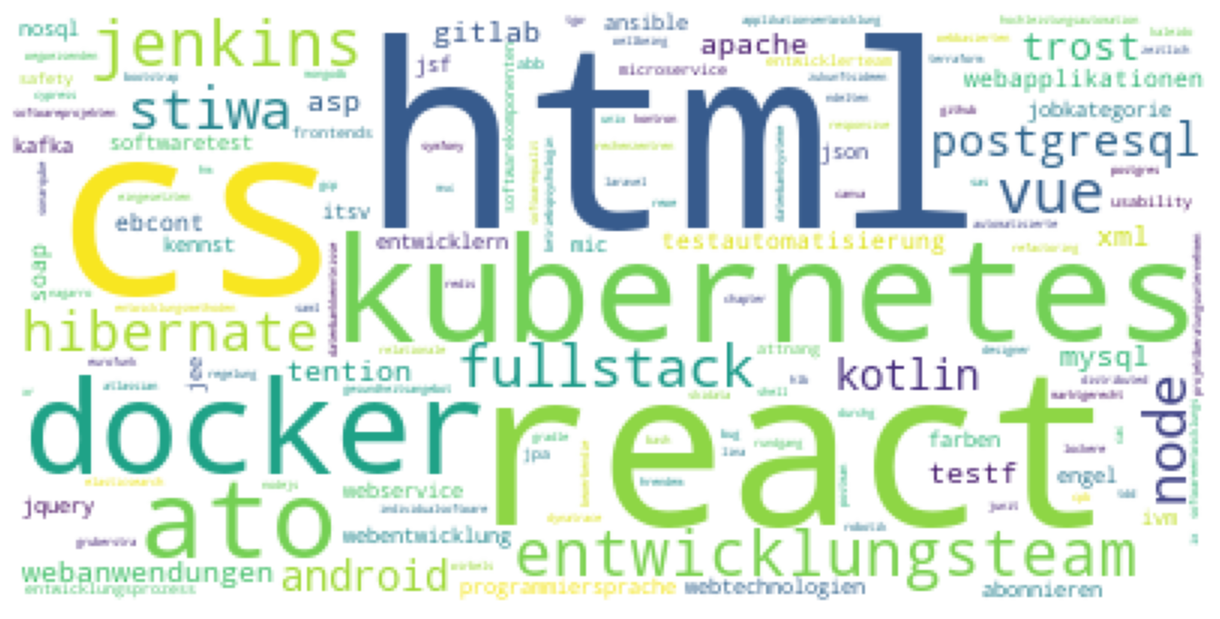

In [33]:
plt.figure(figsize = (12,12), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)